In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import unittest
from nose.tools import *

In [0]:
%matplotlib inline
plt.rcParams["figure.figsize"] =figsize=(10,8)

# Ski resorts
## A research of world ski resorts:
## What are the top countries with ski resorts and is there a statistically significant difference in ski pass prices between this countries?


## Author: Hristo Mavrodiev
Project requirements - [link](https://softuni.bg/downloads/svn/Data-Science/June-2019/09.%20Exam/assessment-guidelines.txt)
## Abstract:
The purpose of this research is to find what are the top countries with ski resorts. Is there any statistically significant difference in ski pass prices for adults in this countries. The research is trying to find the features that are mostly affecting the ski pass prices in this datasets. The correlation coefficients of the dataset columns are compared to the whole dataset and separated by country. Maybe different countries have different pricing models for ski pass prices. Also interesting question is what is the best time in the year to visit a ski resort. For this question are used snowfall meteostation information in 4 different resorts: " the Jackson Hole resort,USA","the Snowbird, USA","the Telluride resort, USA" and "the Whistler-Blackcomb resort,Canada".


## Introduction:
In this research we will try to find a country for a winter vacation. Maybe the top countries with ski resorts will be the countries that have The Apls in their territory -  France, Switzerland, Monaco, Italy, Liechtenstein, Austria, Germany, and Slovenia. The research will try to find the cheapest countries with great ski slopes. Another point of view will be the overall rating for this countries. The prices could be very cheap somewhere, but this could be because the overall rating is low. The time when the customer is visiting the resort is also crucial, to enjoy the maximum fresh snow. The data from the meteostations combined to try to answer this question.

## The  Datasets 
The following code shows the loading of the following datasets, gathered from "Kaggle" :  
* dataset  Ski Resorts Daily snowfall  - snowfall in USA and Canada ski resorts (separated on 4 csv files) **[1]**.   - the dataset is from "Kaggle", which is webcreaped from OnTheSnow.com
* dataset World Ski Resorts **[2]** - contains rating and prices of ski resorts all over the world; Downloaded from "kaggle", previously webscraped from http://www.skiresort.info


## 1.1 Ski Resorts Daily snowfall [1]- Data loading and cleaning

In [0]:
blackcomb_ca = pd.read_csv("https://www.dropbox.com/s/dezkayzrwlxgqmw/Whistler%20Blackcomb%20-%20BC%20Canada.csv?dl=1")
assert_is_not_none(blackcomb_ca)
assert_is_instance(blackcomb_ca, pd.DataFrame)
assert_equal(blackcomb_ca.shape, (671, 4))

In [4]:
blackcomb_ca.head()

,Date,24 hr New Snow,Season Snowfall Total,Base Depth
0,1-Jan-17,8 cm,8 cm,0 cm
1,6-Jan-17,1 cm,9 cm,0 cm
2,7-Jan-17,4 cm,13 cm,0 cm
3,9-Jan-17,15 cm,28 cm,0 cm
4,10-Jan-17,3 cm,31 cm,0 cm


In [5]:
blackcomb_ca.dtypes

Date                     object
24 hr New Snow           object
Season Snowfall Total    object
Base Depth               object
dtype: object

In [0]:
def clean_second_df(df):
    """
    The purpose of this function will be to clean the dataset that is separeted on 4 csv files.
    
    Input: uncleaned pandas dataframe from the French snowfall data.
    Output: set the fields with the correct dtype and rename the columns with the same name.
    
    
    Date columns is converted to datetype
    The base_depth column is cast to float, because the np.NaN values are float type.
    
    
    """
    #We will use this function to clean only the csv files from the second dataset.
    #So we will validate that we have 4 columns
    
    assert_equal(df.shape[1], 4)
    
    assert_is_not_none(df['Date'])
    assert_is_not_none(df['24 hr New Snow'])
    assert_is_not_none(df['Season Snowfall Total'])
    assert_is_not_none(df['Base Depth'])
    
    df.columns = ['date', 'snow_24h', 'sn_total_snowfall','base_depth']
    df.replace(" cm","",inplace = True)
    df.date =  pd.to_datetime(df.date, format='%d-%b-%y')
    df.snow_24h = df.snow_24h.str.replace(' cm','')
    df.snow_24h = df.snow_24h.astype(int)
    df.sn_total_snowfall = df.sn_total_snowfall.str.replace(' cm','')
    df.sn_total_snowfall = df.sn_total_snowfall.astype(int)
    df.base_depth = df.base_depth.str.replace(' cm','')
    df.base_depth = df.base_depth.astype(float)
    df.base_depth = df.base_depth.replace(0,np.nan)
    
    #assert_equal(df['date'].dtype, 'datetime64[ns]')
    assert_equal(df['snow_24h'].dtype, int)
    assert_equal(df['sn_total_snowfall'].dtype, int)
    assert_equal(df['base_depth'].dtype, float)
    
    return df
    

In [7]:
blackcomb_ca = clean_second_df(blackcomb_ca)
blackcomb_ca.describe()

,snow_24h,sn_total_snowfall,base_depth
count,671.000000,671.000000,553.000000
mean,11.202683,436.719821,204.271248
std,11.172490,292.547961,93.609032
min,1.000000,1.000000,2.000000
25%,3.000000,212.000000,135.000000
50%,8.000000,385.000000,196.000000
75%,15.000000,631.500000,274.000000
max,71.000000,1247.000000,391.000000


In [8]:
blackcomb_ca.dtypes

date                 datetime64[ns]
snow_24h                      int64
sn_total_snowfall             int64
base_depth                  float64
dtype: object

We are expecting to perform the same cleaning on the next cvs file, part of the same dataset.

In [0]:
telluride_usa_co = pd.read_csv("https://www.dropbox.com/s/fwjlwqf565kqh60/Telluride%20-%20Colorado.csv?dl=1",)
assert_is_not_none(telluride_usa_co)
assert_is_instance(telluride_usa_co, pd.DataFrame)
assert_equal(telluride_usa_co.shape, (406, 4))

In [10]:
telluride_usa_co.head()

,Date,24 hr New Snow,Season Snowfall Total,Base Depth
0,1-Jan-17,3 cm,3 cm,91 cm
1,2-Jan-17,8 cm,11 cm,94 cm
2,3-Jan-17,3 cm,14 cm,91 cm
3,4-Jan-17,3 cm,17 cm,94 cm
4,5-Jan-17,10 cm,27 cm,99 cm


In [11]:
telluride_usa_co = clean_second_df(telluride_usa_co)
telluride_usa_co.describe()

,snow_24h,sn_total_snowfall,base_depth
count,406.000000,406.000000,399.000000
mean,11.566502,268.256158,130.774436
std,9.381056,167.620923,40.200806
min,3.000000,3.000000,30.000000
25%,5.000000,127.250000,104.000000
50%,8.000000,261.500000,135.000000
75%,15.000000,393.250000,160.000000
max,56.000000,661.000000,218.000000


In [12]:
telluride_usa_co.dtypes

date                 datetime64[ns]
snow_24h                      int64
sn_total_snowfall             int64
base_depth                  float64
dtype: object

In [0]:
snowbird_usa_uth = pd.read_csv("https://www.dropbox.com/s/orj23w1pz7r6nyc/Snowbird%20-%20Utah.csv?dl=1")
assert_is_not_none(snowbird_usa_uth)
assert_is_instance(snowbird_usa_uth, pd.DataFrame)
assert_equal(snowbird_usa_uth.shape, (586, 4))

In [14]:
snowbird_usa_uth.tail()

,Date,24 hr New Snow,Season Snowfall Total,Base Depth
581,23-Dec-09,13 cm,1150 cm,119 cm
582,24-Dec-09,3 cm,1153 cm,119 cm
583,25-Dec-09,3 cm,1156 cm,117 cm
584,27-Dec-09,3 cm,1159 cm,117 cm
585,31-Dec-09,43 cm,1202 cm,135 cm


In [15]:

snowbird_usa_uth = clean_second_df(snowbird_usa_uth)
snowbird_usa_uth.describe()

,snow_24h,sn_total_snowfall,base_depth
count,586.000000,586.000000,535.000000
mean,15.580205,521.633106,195.091589
std,12.815237,311.438872,78.303626
min,3.000000,3.000000,13.000000
25%,5.000000,256.000000,147.000000
50%,13.000000,508.000000,190.000000
75%,23.000000,768.500000,254.000000
max,64.000000,1202.000000,401.000000


In [16]:
snowbird_usa_uth.dtypes

date                 datetime64[ns]
snow_24h                      int64
sn_total_snowfall             int64
base_depth                  float64
dtype: object

In [0]:
jackson_usa_wyo = pd.read_csv("https://www.dropbox.com/s/kywfc2fr9l93xk0/Jackson%20Hole%20-%20Wyoming.csv?dl=1",)
assert_is_not_none(jackson_usa_wyo)
assert_is_instance(jackson_usa_wyo, pd.DataFrame)
assert_equal(jackson_usa_wyo.shape, (693, 4))

In [18]:
jackson_usa_wyo.tail()

,Date,24 hr New Snow,Season Snowfall Total,Base Depth
688,22-Dec-09,3 cm,1029 cm,66 cm
689,23-Dec-09,3 cm,1032 cm,66 cm
690,24-Dec-09,5 cm,1037 cm,66 cm
691,30-Dec-09,8 cm,1045 cm,64 cm
692,31-Dec-09,13 cm,1058 cm,64 cm


In [19]:
jackson_usa_wyo=clean_second_df(jackson_usa_wyo)
jackson_usa_wyo.describe()

,snow_24h,sn_total_snowfall,base_depth
count,693.000000,693.000000,670.000000
mean,13.610390,538.190476,130.940299
std,11.354178,333.939463,92.428372
min,3.000000,3.000000,3.000000
25%,5.000000,267.000000,66.000000
50%,10.000000,506.000000,122.000000
75%,18.000000,765.000000,179.500000
max,86.000000,1562.000000,1689.000000


In [20]:
def pivot_snowfall(df,column,function,name):
    """
    Helper function to convert dataframes to pivot tables, which are an input for heatmaps.
    
    Input:
    df-dataframe with snowfall data
    column - a column name which will be used for appling a function on it
    function - mean; max; min; - a pivot table aggfunc argument
    name- name of the dataframe used in the map visualization 
    
    Output: 
    pt - a pivot table dataframe
    """
    
    df= df.dropna()
    df["Year"] = df.date.apply(lambda x: x.year)
    df["Month"] = df.date.apply(lambda x: x.strftime("%b"))
    pt =df.pivot_table(index="Month",columns="Year",values=column, aggfunc=function).fillna(np.nan)
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    pt = pt.reindex(months)
    pt.name = name
    return pt
blackcomb_mean = pivot_snowfall(blackcomb_ca,'snow_24h','mean','Blackcomb')
telluride_mean = pivot_snowfall(telluride_usa_co,'snow_24h','mean','Telluride')
snowbird_mean = pivot_snowfall(snowbird_usa_uth,'snow_24h','mean','Snowbird')
jackson_hole_mean = pivot_snowfall(jackson_usa_wyo,'snow_24h','mean','Jackson Hole') 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
blackcomb_d_mean = pivot_snowfall(blackcomb_ca,'base_depth','mean','Blackcomb')
telluride_d_mean = pivot_snowfall(telluride_usa_co,'base_depth','mean','Telluride')
snowbird_d_mean = pivot_snowfall(snowbird_usa_uth,'base_depth','mean','Snowbird')
jackson_hole_d_mean = pivot_snowfall(jackson_usa_wyo,'base_depth','mean','Jackson Hole')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
blackcomb_count = pivot_snowfall(blackcomb_ca,'base_depth','count','Blackcomb')
telluride_count = pivot_snowfall(telluride_usa_co,'base_depth','count','Telluride')
snowbird_count = pivot_snowfall(snowbird_usa_uth,'base_depth','count','Snowbird')
jackson_hole_count = pivot_snowfall(jackson_usa_wyo,'base_depth','count','Jackson Hole')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 1.2Visualizations

In [0]:
def plot_multi_heatmaps(title,*args):
    """
    Function to create multiple heatmaps on the same line.
    Input: 
    title - main title of the map
    *args - pivot dataframes, prepared from pivor_snowfall function
    
    Output - multiple heatmaps on the same line
    The visualization cannot handle plot on many lines. It's just stack all input dataset on the same line.
    
    """
    fig = plt.figure(figsize=(22,8))
    total_plots = len(args)
    a ={}
    for i in range(total_plots +1):
        a[i] = "ax" + str(i)
    for count, dfs in enumerate(args):
        a[count] = fig.add_subplot(1,total_plots,count+1)
        sns.heatmap(dfs, annot=True,fmt='.0f',ax = a[count], linewidths=.5, cmap="Blues", mask=dfs.isnull() )
        a[count].title.set_text((dfs.name))
    fig.suptitle(title)

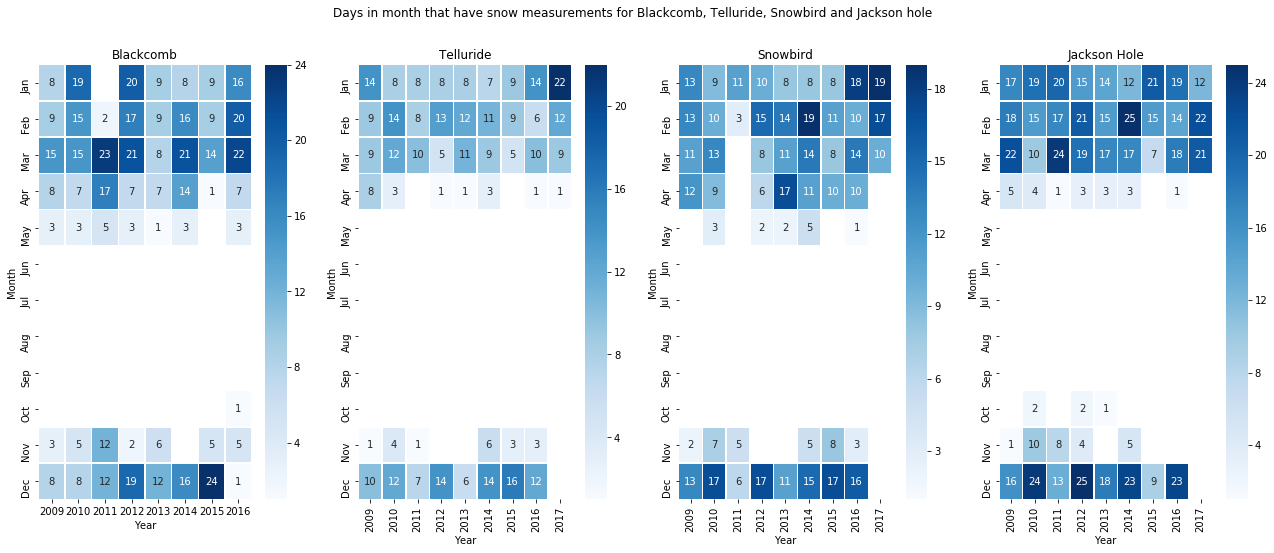

In [24]:
plot_multi_heatmaps("Days in month that have snow measurements for Blackcomb, Telluride, Snowbird and Jackson hole",
                    blackcomb_count,telluride_count,snowbird_count,jackson_hole_count)

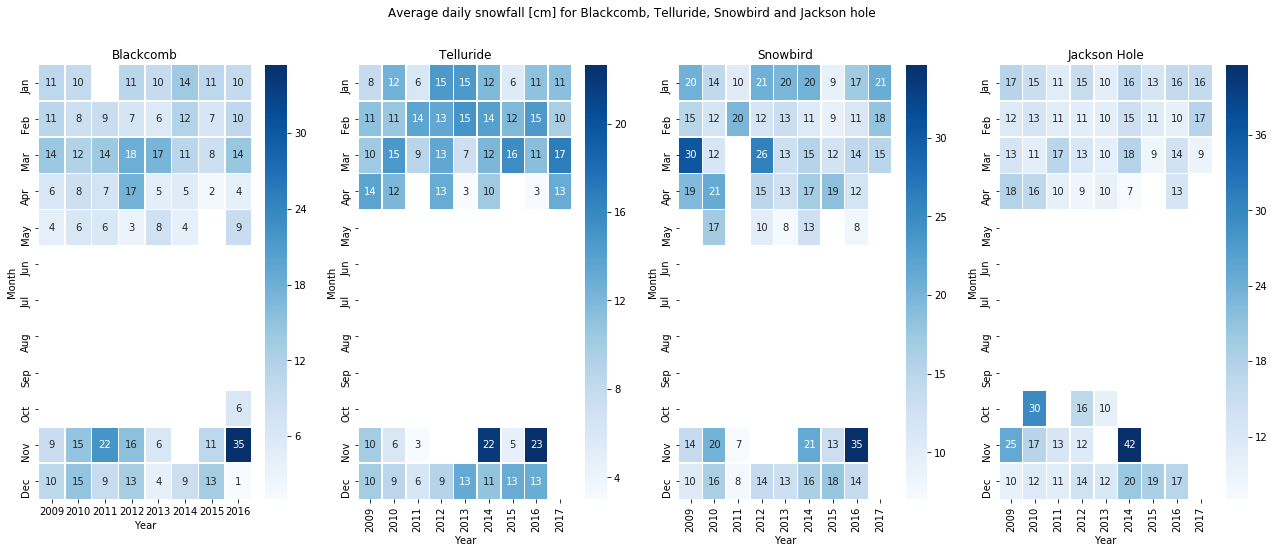

In [25]:
plot_multi_heatmaps("Average daily snowfall [cm] for Blackcomb, Telluride, Snowbird and Jackson hole",
                    blackcomb_mean,telluride_mean,snowbird_mean,jackson_hole_mean)

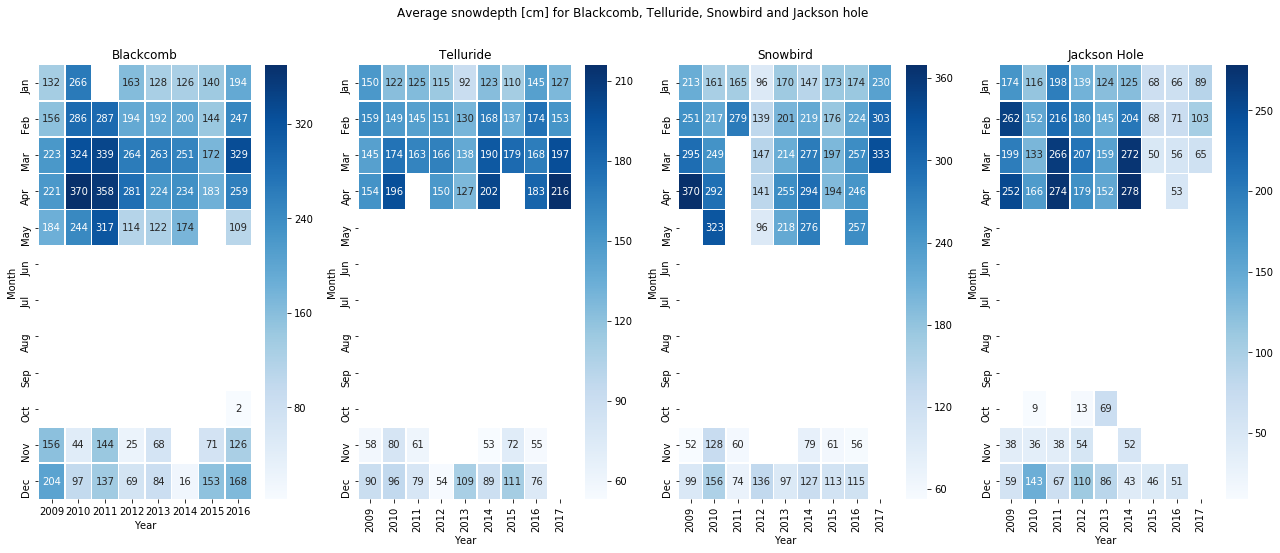

In [26]:
plot_multi_heatmaps("Average snowdepth [cm] for Blackcomb, Telluride, Snowbird and Jackson hole",
                    blackcomb_d_mean,telluride_d_mean,snowbird_d_mean,jackson_hole_d_mean)

In [27]:
start_date = '2011-01-01'
end_date = '2011-02-28'
blackcomb_ca[(blackcomb_ca.date > start_date) & (blackcomb_ca.date <= end_date)]


,date,snow_24h,sn_total_snowfall,base_depth
462,2011-02-27,5,5,282.0
463,2011-02-28,13,18,292.0


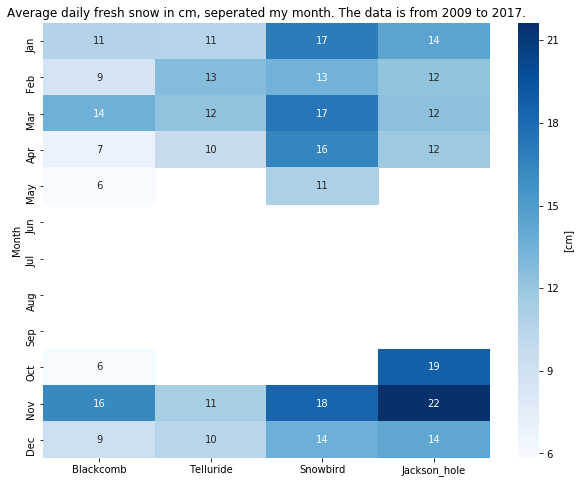

In [28]:
def mean_snow_by_month():
    """
    The function is using the already created datasets and outputs a heatmap.
    It tooks the mean values for every month/year and do again calculation of the mean accross the year from 2009 to 2017.
    The result is double mean value for average daily snowfall.
       
    
    """
    resort_mean = pd.DataFrame()
    resort_mean['Blackcomb'] = blackcomb_mean.T.mean()
    resort_mean['Telluride'] = telluride_mean.T.mean()
    resort_mean['Snowbird'] = snowbird_mean.T.mean()
    resort_mean['Jackson_hole'] = jackson_hole_mean.T.mean()
    plt.figure(figsize=(10,8))
    plt.title("Average daily fresh snow in cm, seperated my month. The data is from 2009 to 2017.")
    sns.heatmap(resort_mean,annot=True,cmap='Blues',fmt='.0f', cbar_kws={'label': '[cm]'})
mean_snow_by_month()

## 1.3 Conclusion: 
From https://www.undercovertourist.com/blog/best-time-ski/ the best time for ski should be from January to March. -  


"*Generally early January through early March (minus the holidays) is the best time to ski. It's peak powder time, and the slopes are less crowded.Oct 9, 2018*"       


In our research we took 4 ski resorts with their average new snowfall data.
For this resort the best time in the year to visit them, based on the new average daily snowfall is January, Februaryor March - visually confirmed by the heatmap, because for November and December the base depth of the snow is very low.



## 2.1 Dataset World Ski Resorts [2]
## Data loading and cleaning

In [0]:
def read_world_ski_resort():
    """function to read the world_ski_resorts dataset with included asset test. 
    There are some special characters that require an encoding ISO-8859-1 to succesfully read the dataset."""
    world_ski_resort = pd.read_csv("https://www.dropbox.com/s/7k80ooblzsuo40b/skiResort.csv?dl=1",encoding = "ISO-8859-1")     
    assert_is_not_none(world_ski_resort)
    assert_is_instance(world_ski_resort, pd.DataFrame)
    return world_ski_resort
world_ski_resort = read_world_ski_resort()

In [30]:
world_ski_resort.tail()

,Resort Name,Continent,Country,State/Province,URL,Altitude,Easy,Intermediate,Difficult,Funicular,Circulating ropeway/gondola lift,Chairlift,T-bar lift/platter/button lift,Sunkid Moving Carpet,Adult,Youth,Child,Currency,Ski resort size,"Slope offering, variety of runs",Lifts and cable cars,Snow reliability,Slope preparation,"Access, on-site parking","Orientation (trail map, information boards, sign-postings)",Cleanliness and hygiene,Environmentally friendly ski operation,Friendliness of staff,"Mountain restaurants, ski huts, gastronomy",Après-ski,Accommodation offering directly at the slopes and lifts,Families and children,Beginners,"Advanced skiers, freeriders",Snow parks,Cross-country skiing and trails,Aerial tramway/reversible ropeway,Rope tow/beginner lift,People mover,Combined installation (gondola and chair),Cog railway,Helicopter for Heli-skiing,Snow caterpillars for Cat-skiing
5465,zvicina,Europe,Czech Republic,Hradec Kralove Region (Kralovehradecky kraj),http://www.skiresort.info/ski-resort/zvicina/,710.0,1.5,0.7,0.0,NaN,NaN,NaN,0.0,NaN,300.0,0.0,230.0,Czech koruna,1.3,1.3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5466,zviedru-cepure,Europe,Latvia,NaN,http://www.skiresort.info/ski-resort/zviedru-c...,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,7.0,European Euro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5467,zweibruecken,Europe,Germany,Rhineland-Palatinate (Rheinland-Pfalz),http://www.skiresort.info/ski-resort/zweibruec...,376.0,0.3,0.2,0.1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5468,zwoelferhorn-st-gilgen,Europe,Austria,Salzburg (Salzburger Land),http://www.skiresort.info/ski-resort/zwoelferh...,1522.0,1.0,5.0,1.0,NaN,0.0,NaN,0.0,NaN,30.0,0.0,20.0,European Euro,2.0,2.3,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5469,zwoelfmorgental-wernigerode,Europe,Germany,Central Uplands of Germany (Deutsche Mittelgeb...,http://www.skiresort.info/ski-resort/zwoelfmor...,465.0,0.5,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,-,1.1,1.0,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
def world_ski_column_names(world_ski_resort):
    """
    simplify column names for dataset world_ski_resorts
    Input: datasframe world_ski_resort with long column names
    Output: dataframe with short column names
    
    
    """
    assert_is_not_none(world_ski_resort)
    world_ski_resort.columns=["name","continent","country","state","url","altitude","easy","intermediate","dificult","funicular","gondola_lift",
                                        "chairlift","tbar_lift","moving_carpet","adult", "youth","child","currency","resort_size","slope","lifts_cable_cars",
                                        "snow_reliability","snow_preparation","parking","orientation","cleanliness","env_friendly","staff","restaurants","apres_ski",
                                        "accomodation","families","beginners","advanced","snow_parks","cross-country","aerial_tramway","rope_tow","people_mover",
                                        "gondola_chair","cog_railway","heli-skiing","cat-skiing"]
    return world_ski_resort
world_ski_resort = world_ski_column_names(world_ski_resort)

In [32]:
world_ski_resort.dtypes

name                 object
continent            object
country              object
state                object
url                  object
altitude            float64
easy                float64
intermediate        float64
dificult            float64
funicular           float64
gondola_lift        float64
chairlift           float64
tbar_lift           float64
moving_carpet       float64
adult               float64
youth               float64
child               float64
currency             object
resort_size         float64
slope               float64
lifts_cable_cars    float64
snow_reliability    float64
snow_preparation    float64
parking             float64
orientation         float64
cleanliness         float64
env_friendly        float64
staff               float64
restaurants         float64
apres_ski           float64
accomodation        float64
families            float64
beginners           float64
advanced            float64
snow_parks          float64
cross-country       

In [33]:
world_ski_resort.describe()

,altitude,easy,intermediate,dificult,funicular,gondola_lift,chairlift,tbar_lift,moving_carpet,adult,youth,child,resort_size,slope,lifts_cable_cars,snow_reliability,snow_preparation,parking,orientation,cleanliness,env_friendly,staff,restaurants,apres_ski,accomodation,families,beginners,advanced,snow_parks,cross-country,aerial_tramway,rope_tow,people_mover,gondola_chair,cog_railway,heli-skiing,cat-skiing
count,5470.000000,4620.000000,4620.000000,4620.000000,56.0,444.0,1670.0,2491.0,538.0,5.470000e+03,5470.000000,5470.000000,3453.000000,3453.000000,3453.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,199.0,1323.0,771.0,61.0,13.0,109.0,63.0
mean,1017.423949,4.765000,5.394026,2.403550,0.0,0.0,0.0,0.0,0.0,7.543777e+02,73.865704,345.131402,1.806458,1.954590,2.264610,3.851163,4.172093,3.560465,3.320930,3.990698,3.551163,3.746512,3.404651,2.676744,2.837209,3.844186,3.713953,3.006977,2.962791,2.972093,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,822.660267,12.563428,14.287310,7.231032,0.0,0.0,0.0,0.0,0.0,1.562318e+04,887.073256,2828.436186,0.844951,1.054176,1.045059,1.111997,0.803931,0.868951,1.146304,0.519913,0.757825,0.698600,0.940652,1.003569,1.299637,0.896198,0.908156,1.439518,1.460757,1.295199,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,410.000000,0.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,1.200000,1.000000,1.500000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,843.000000,1.400000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000e+01,0.000000,12.000000,1.500000,1.600000,1.800000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1500.000000,4.000000,4.100000,2.000000,0.0,0.0,0.0,0.0,0.0,5.250000e+01,0.000000,30.000000,2.200000,2.600000,3.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.750000,4.000000,4.000000,4.000000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5000.000000,312.000000,239.000000,126.000000,0.0,0.0,0.0,0.0,0.0,1.119000e+06,37500.000000,70970.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
def drop_empty_nan(df):
    """
    This function is dropping the columns with no information in it. The list is hardcoded from a manual analysis on the describe table above.
    Every column that have only zeros is dropped. Also zeros in price and altitude are replaced with np.NaN
    """
    assert_is_not_none(df)
    assert_true('funicular' in set(df.columns))
    test_set = set(['funicular','gondola_lift','chairlift','tbar_lift','moving_carpet','aerial_tramway','rope_tow',
                 'people_mover','gondola_chair','cog_railway','heli-skiing','cat-skiing'])
    assert_true(test_set.issubset(set(df.columns)))             
    
    #Tests ends, the next code is the function
    df = df.drop(['funicular','gondola_lift','chairlift','tbar_lift','moving_carpet','aerial_tramway','rope_tow',
                 'people_mover','gondola_chair','cog_railway','heli-skiing','cat-skiing'],axis=1)
    df['altitude'] = df.altitude.replace(0.0, np.nan)
    df['adult'] = df.adult.replace(0.0, np.nan)
    df['youth'] = df.youth.replace(0.0, np.nan)
    df['child'] = df.child.replace(0.0, np.nan)
    return df
world_ski_resort = drop_empty_nan(world_ski_resort)
world_ski_resort

,name,continent,country,state,url,altitude,easy,intermediate,dificult,adult,youth,child,currency,resort_size,slope,lifts_cable_cars,snow_reliability,snow_preparation,parking,orientation,cleanliness,env_friendly,staff,restaurants,apres_ski,accomodation,families,beginners,advanced,snow_parks,cross-country
0,3-5-pigadia-naoussa,Europe,Greece,Central Macedonia,http://www.skiresort.info/ski-resort/3-5-pigad...,2005.0,4.0,3.0,2.0,15.0,13.0,9.0,European Euro,2.1,2.4,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4-vallees-verbierla-tzoumaznendazveysonnazthyon,Europe,Switzerland,Lemanic Region,http://www.skiresort.info/ski-resort/4-vallees...,3330.0,107.0,202.0,103.0,75.0,64.0,38.0,Swiss Franc,5.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,5.0,5.0,3.0
2,49-degrees-north-mountain-resort,North America,USA,Washington State,http://www.skiresort.info/ski-resort/49-degree...,1760.0,20.0,27.0,21.0,58.0,NaN,48.0,US Dollar,3.5,3.9,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aadneram-skitrekk,Europe,Norway,Vest-Agder,http://www.skiresort.info/ski-resort/aadneram-...,680.0,3.5,0.5,0.0,350.0,NaN,280.0,Norwegian krone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aal-skisenter,Europe,Norway,Buskerud,http://www.skiresort.info/ski-resort/aal-skise...,1040.0,5.0,2.0,2.5,370.0,NaN,280.0,Norwegian krone,2.0,2.3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,aalen-skisenter,Europe,Norway,Sor-Trondelag,http://www.skiresort.info/ski-resort/aalen-ski...,726.0,5.0,2.0,1.0,350.0,NaN,285.0,Norwegian krone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,aamaals-skicenter,Europe,Sweden,South Sweden (Sydsverige),http://www.skiresort.info/ski-resort/aamaals-s...,270.0,1.5,0.5,0.0,220.0,190.0,150.0,Swedish krona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,aare,Europe,Sweden,Northern Sweden (Norrland),http://www.skiresort.info/ski-resort/aare/,1274.0,45.0,38.0,8.0,465.0,NaN,370.0,Swedish krona,4.0,4.0,3.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0
8,aarjaeng,Europe,Sweden,Central Sweden,http://www.skiresort.info/ski-resort/aarjaeng/,280.0,1.0,0.0,0.0,100.0,NaN,80.0,Swedish krona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,aavasaksa,Europe,Finland,Northern Finland,http://www.skiresort.info/ski-resort/aavasaksa/,220.0,1.5,0.5,0.0,10.0,NaN,NaN,European Euro,1.3,1.3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
def calc_total_slope(df):
    
    """Sum of three columns for the length of slopes with labels: easy,intermadiate,dificult"""
    assert_true('easy' in set(df.columns))
    assert_true('intermediate' in set(df.columns))
    assert_true('dificult' in set(df.columns))
    assert_is_not_none(df)
    
    df['total_slope'] = (df.easy + df.intermediate + df.dificult)
    
    return df
world_ski_resort = calc_total_slope(world_ski_resort)
world_ski_resort

,name,continent,country,state,url,altitude,easy,intermediate,dificult,adult,youth,child,currency,resort_size,slope,lifts_cable_cars,snow_reliability,snow_preparation,parking,orientation,cleanliness,env_friendly,staff,restaurants,apres_ski,accomodation,families,beginners,advanced,snow_parks,cross-country,total_slope
0,3-5-pigadia-naoussa,Europe,Greece,Central Macedonia,http://www.skiresort.info/ski-resort/3-5-pigad...,2005.0,4.0,3.0,2.0,15.0,13.0,9.0,European Euro,2.1,2.4,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
1,4-vallees-verbierla-tzoumaznendazveysonnazthyon,Europe,Switzerland,Lemanic Region,http://www.skiresort.info/ski-resort/4-vallees...,3330.0,107.0,202.0,103.0,75.0,64.0,38.0,Swiss Franc,5.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,5.0,5.0,3.0,412.0
2,49-degrees-north-mountain-resort,North America,USA,Washington State,http://www.skiresort.info/ski-resort/49-degree...,1760.0,20.0,27.0,21.0,58.0,NaN,48.0,US Dollar,3.5,3.9,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0
3,aadneram-skitrekk,Europe,Norway,Vest-Agder,http://www.skiresort.info/ski-resort/aadneram-...,680.0,3.5,0.5,0.0,350.0,NaN,280.0,Norwegian krone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
4,aal-skisenter,Europe,Norway,Buskerud,http://www.skiresort.info/ski-resort/aal-skise...,1040.0,5.0,2.0,2.5,370.0,NaN,280.0,Norwegian krone,2.0,2.3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.5
5,aalen-skisenter,Europe,Norway,Sor-Trondelag,http://www.skiresort.info/ski-resort/aalen-ski...,726.0,5.0,2.0,1.0,350.0,NaN,285.0,Norwegian krone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
6,aamaals-skicenter,Europe,Sweden,South Sweden (Sydsverige),http://www.skiresort.info/ski-resort/aamaals-s...,270.0,1.5,0.5,0.0,220.0,190.0,150.0,Swedish krona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
7,aare,Europe,Sweden,Northern Sweden (Norrland),http://www.skiresort.info/ski-resort/aare/,1274.0,45.0,38.0,8.0,465.0,NaN,370.0,Swedish krona,4.0,4.0,3.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0,91.0
8,aarjaeng,Europe,Sweden,Central Sweden,http://www.skiresort.info/ski-resort/aarjaeng/,280.0,1.0,0.0,0.0,100.0,NaN,80.0,Swedish krona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,aavasaksa,Europe,Finland,Northern Finland,http://www.skiresort.info/ski-resort/aavasaksa/,220.0,1.5,0.5,0.0,10.0,NaN,NaN,European Euro,1.3,1.3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [36]:
def average_rating(df):
    
    
    """Averages the rating columns for the world_ski_resorts dataset."""
    testset = set(['resort_size','slope','lifts_cable_cars','snow_reliability','snow_preparation',	'parking',
                        'orientation','cleanliness','env_friendly','staff','restaurants','apres_ski','accomodation',
                        'families','beginners','advanced','snow_parks','cross-country'])
    assert_true(testset.issubset(set(df.columns)))
    assert_is_not_none(df)
    
    
    df['average_rating'] = df[['resort_size','slope','lifts_cable_cars','snow_reliability','snow_preparation',	'parking',
                        'orientation','cleanliness','env_friendly','staff','restaurants','apres_ski','accomodation',
                        'families','beginners','advanced','snow_parks','cross-country']].mean(axis=1)
    return df
world_ski_resort = average_rating(world_ski_resort)
world_ski_resort

,name,continent,country,state,url,altitude,easy,intermediate,dificult,adult,youth,child,currency,resort_size,slope,lifts_cable_cars,snow_reliability,snow_preparation,parking,orientation,cleanliness,env_friendly,staff,restaurants,apres_ski,accomodation,families,beginners,advanced,snow_parks,cross-country,total_slope,average_rating
0,3-5-pigadia-naoussa,Europe,Greece,Central Macedonia,http://www.skiresort.info/ski-resort/3-5-pigad...,2005.0,4.0,3.0,2.0,15.0,13.0,9.0,European Euro,2.1,2.4,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2.333333
1,4-vallees-verbierla-tzoumaznendazveysonnazthyon,Europe,Switzerland,Lemanic Region,http://www.skiresort.info/ski-resort/4-vallees...,3330.0,107.0,202.0,103.0,75.0,64.0,38.0,Swiss Franc,5.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,5.0,5.0,3.0,412.0,4.222222
2,49-degrees-north-mountain-resort,North America,USA,Washington State,http://www.skiresort.info/ski-resort/49-degree...,1760.0,20.0,27.0,21.0,58.0,NaN,48.0,US Dollar,3.5,3.9,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,3.466667
3,aadneram-skitrekk,Europe,Norway,Vest-Agder,http://www.skiresort.info/ski-resort/aadneram-...,680.0,3.5,0.5,0.0,350.0,NaN,280.0,Norwegian krone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,aal-skisenter,Europe,Norway,Buskerud,http://www.skiresort.info/ski-resort/aal-skise...,1040.0,5.0,2.0,2.5,370.0,NaN,280.0,Norwegian krone,2.0,2.3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.5,1.933333
5,aalen-skisenter,Europe,Norway,Sor-Trondelag,http://www.skiresort.info/ski-resort/aalen-ski...,726.0,5.0,2.0,1.0,350.0,NaN,285.0,Norwegian krone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN
6,aamaals-skicenter,Europe,Sweden,South Sweden (Sydsverige),http://www.skiresort.info/ski-resort/aamaals-s...,270.0,1.5,0.5,0.0,220.0,190.0,150.0,Swedish krona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
7,aare,Europe,Sweden,Northern Sweden (Norrland),http://www.skiresort.info/ski-resort/aare/,1274.0,45.0,38.0,8.0,465.0,NaN,370.0,Swedish krona,4.0,4.0,3.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0,91.0,4.000000
8,aarjaeng,Europe,Sweden,Central Sweden,http://www.skiresort.info/ski-resort/aarjaeng/,280.0,1.0,0.0,0.0,100.0,NaN,80.0,Swedish krona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
9,aavasaksa,Europe,Finland,Northern Finland,http://www.skiresort.info/ski-resort/aavasaksa/,220.0,1.5,0.5,0.0,10.0,NaN,NaN,European Euro,1.3,1.3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.366667


In [37]:
world_ski_resort.country.unique()

array(['Greece', 'Switzerland', 'USA', 'Norway', 'Sweden', 'Finland',
       'Iran', 'Turkey', 'Japan', 'Russia', 'Canada', 'United Kingdom',
       'Italy', 'France', 'Volga Federal District', 'Germany', 'China',
       'Ural Federal District', 'Lesotho', 'Turkmenistan', 'Austria',
       'Kazakhstan', 'Kyrgyzstan', 'Armenia ', 'Lithuania',
       'Czech Republic', 'South Korea', 'Southern Russia', 'New Zealand',
       'Spain', 'Poland', 'Greenland', 'Ukraine', 'Chile', 'Andorra',
       'Romania', 'North Caucasus', 'Belgium', 'India', 'Morocco',
       'Bosnia and Herzegovina', 'Slovakia', 'Siberia', 'Latvia',
       'Georgia', 'Hungary', 'Bulgaria', 'Argentina',
       'United Arab Emirates', 'Croatia', 'Slovenia', 'Australia',
       'Northwest Russia', 'Albania', 'Iceland', 'Serbia', 'Mexico',
       'Kosovo', 'Uzbekistan', 'Algeria', 'Denmark', 'Netherlands',
       'Iraq', 'Liechtenstein', 'Montenegro', 'Qatar', 'Macedonia',
       'Lebanon', 'Malaysia', 'Far Eastern Federal Di

In [38]:
world_ski_resort.currency.unique()

array(['European Euro', 'Swiss Franc', 'US Dollar', 'Norwegian krone',
       'Swedish krona', '-', 'Japanese Yen', 'UK Pound', 'Russian ruble',
       'South African rand', 'Czech koruna', 'Canadian Dollar',
       'South Korean won', 'Polish zloty', 'Chiliean Peso',
       'Romanian leu', 'New Zealand Dollar', 'Bosnia convertible mark',
       'Chinese Yuan', 'Georgian Lari', 'Bulgarian Lev', 'Argentine Peso',
       'Australian dollar', 'Icelandic krona', 'Ukrainian hryvnia',
       'Croatian Kuna', 'Danish Krone', 'Serbian dinar', 'Iranian rial',
       'Hungarian forint', 'Turkish lira', 'Lebanese pound',
       'Indian rupee', 'Kyrgyzstani som', 'Kazakhstani tenge',
       'Macedonian denar', 'Israeli new shekel', 'Azerbaijani manat',
       'United Arab Emerites', 'unknown', 'Mongolian togrog',
       'Armenian Dram'], dtype=object)

In [39]:
list(world_ski_resort.groupby(by='country')['currency'].unique())

[array(['-'], dtype=object),
 array(['-'], dtype=object),
 array(['European Euro'], dtype=object),
 array(['Argentine Peso', '-'], dtype=object),
 array(['-', 'Armenian Dram'], dtype=object),
 array(['Australian dollar', '-'], dtype=object),
 array(['European Euro', '-'], dtype=object),
 array(['Azerbaijani manat', '-'], dtype=object),
 array(['-'], dtype=object),
 array(['-'], dtype=object),
 array(['European Euro', '-'], dtype=object),
 array(['Bosnia convertible mark', '-'], dtype=object),
 array(['unknown', '-'], dtype=object),
 array(['Bulgarian Lev', '-'], dtype=object),
 array(['-', 'Canadian Dollar'], dtype=object),
 array(['-'], dtype=object),
 array(['Chiliean Peso', 'US Dollar', '-'], dtype=object),
 array(['-', 'Chinese Yuan'], dtype=object),
 array(['-', 'Croatian Kuna'], dtype=object),
 array(['European Euro'], dtype=object),
 array(['Czech koruna', '-'], dtype=object),
 array(['-', 'Danish Krone'], dtype=object),
 array(['-'], dtype=object),
 array(['-', 'European Euro']

In [0]:
def clean_currency_name(world_ski_resort): 
    """The function is used to replace the currency name with the short name of the currency used in exchanges.
    After all currencies are with the standart shortname from the exchange, this label could be used for automated scraping of the exchange rates.
    
    """
    assert_is_not_none(world_ski_resort)
    assert_true('currency' in set(world_ski_resort.columns))
    
    
    world_ski_resort.currency = world_ski_resort.currency.replace('European Euro','EUR')#1.00
    world_ski_resort.currency = world_ski_resort.currency.replace('Swiss Franc','CHF')#0.91
    world_ski_resort.currency = world_ski_resort.currency.replace('US Dollar','USD') #0.90
    world_ski_resort.currency = world_ski_resort.currency.replace('Norwegian krone','NOK') #0.10
    world_ski_resort.currency = world_ski_resort.currency.replace('Swedish krona','SEK') #0.093
    world_ski_resort.currency = world_ski_resort.currency.replace('Japanese Yen','JPY') #0.0084
    world_ski_resort.currency = world_ski_resort.currency.replace('UK Pound','GBP') #1.09
    world_ski_resort.currency = world_ski_resort.currency.replace('Russian ruble','RUB') #0.014
    world_ski_resort.currency = world_ski_resort.currency.replace('South African rand','ZAR') #0.062
    world_ski_resort.currency = world_ski_resort.currency.replace('Czech koruna','CZK') #0.039
    world_ski_resort.currency = world_ski_resort.currency.replace('Canadian Dollar','CAD') #0.68
    world_ski_resort.currency = world_ski_resort.currency.replace('South Korean won','KRW') #0.00075
    world_ski_resort.currency = world_ski_resort.currency.replace('Polish zloty','PLN') #0.23
    world_ski_resort.currency = world_ski_resort.currency.replace('Chiliean Peso','CLP') #0.0013
    world_ski_resort.currency = world_ski_resort.currency.replace('Romanian leu','RON') #0.21
    world_ski_resort.currency = world_ski_resort.currency.replace('New Zealand Dollar','NZD') #0.59
    world_ski_resort.currency = world_ski_resort.currency.replace('Bosnia convertible mark','BAN') #0.51
    world_ski_resort.currency = world_ski_resort.currency.replace('Chinese Yuan','CNY') #0.13116
    world_ski_resort.currency = world_ski_resort.currency.replace('Georgian Lari','GEL') #0.31
    world_ski_resort.currency = world_ski_resort.currency.replace('Bulgarian Lev','BGN') #0.51
    world_ski_resort.currency = world_ski_resort.currency.replace('Argentine Peso','ARS') #0.20
    world_ski_resort.currency = world_ski_resort.currency.replace('Australian dollar','AUD') #0.61
    world_ski_resort.currency = world_ski_resort.currency.replace('Icelandic krona','ISK') #0.0073
    world_ski_resort.currency = world_ski_resort.currency.replace('Ukrainian hryvnia','UAH') #0.036
    world_ski_resort.currency = world_ski_resort.currency.replace('Croatian Kuna','HRK') #0.14
    world_ski_resort.currency = world_ski_resort.currency.replace('Danish Krone','DKK') #0.27
    world_ski_resort.currency = world_ski_resort.currency.replace('Serbian dinar','RSD') #0.0085
    world_ski_resort.currency = world_ski_resort.currency.replace('Iranian rial','IRR') #0.000021
    world_ski_resort.currency = world_ski_resort.currency.replace('Hungarian forint','HUF') #0.0031
    world_ski_resort.currency = world_ski_resort.currency.replace('Turkish lira', 'TRY') #0.16
    world_ski_resort.currency = world_ski_resort.currency.replace('Lebanese pound','LBP') #0.00060
    world_ski_resort.currency = world_ski_resort.currency.replace('Indian rupee','INR') #0.013
    world_ski_resort.currency = world_ski_resort.currency.replace('Kyrgyzstani som','KGS') #0.013
    world_ski_resort.currency = world_ski_resort.currency.replace('Kazakhstani tenge','KZT') #0.0024
    world_ski_resort.currency = world_ski_resort.currency.replace('Macedonian denar','MKD') #0.016
    world_ski_resort.currency = world_ski_resort.currency.replace('Israeli new shekel','ISL') #0.26
    world_ski_resort.currency = world_ski_resort.currency.replace('Azerbaijani manat','AZN') #0.53
    world_ski_resort.currency = world_ski_resort.currency.replace('United Arab Emerites','AED') #0.25
    world_ski_resort.currency = world_ski_resort.currency.replace('Mongolian togrog','MNT') #0.0003384
    world_ski_resort.currency = world_ski_resort.currency.replace('Armenian Dram','AMD') #0.0019
    return world_ski_resort
world_ski_resort = clean_currency_name(world_ski_resort)

In [0]:
def define_exchange_rate():
    """
    Data is gathered from exchange for every currency to EUR.
    The value are hardcoded in this function, with this the code does not deppend on a website API. 
    In the other hand the future changes of the currency rates are not added in the research.
    For further development automated exchange rate gathering - "Beautiful Soup" package.
    """
    currency_rate = pd.DataFrame(list([('EUR',1.0000000),
    ('CHF',0.9100000),
    ('USD',0.9000000),
    ('NOK',0.1000000),
    ('SEK',0.0930000),
    ('JPY',0.0084000),
    ('GBP',1.0900000),
    ('RUB',0.0140000),
    ('ZAR',0.0620000),
    ('CZK',0.0390000),
    ('CAD',0.6800000),
    ('KRW',0.0007500),
    ('PLN',0.2300000),
    ('CLP',0.0013000),
    ('RON',0.2100000),
    ('NZD',0.5900000),
    ('BAN',0.5100000),
    ('CNY',0.1311600),
    ('GEL',0.3100000),
    ('BGN',0.5100000),
    ('ARS',0.2000000),
    ('AUD',0.6100000),
    ('ISK',0.0073000),
    ('UAH',0.0360000),
    ('HRK',0.1400000),
    ('DKK',0.2700000),
    ('RSD',0.0085000),
    ('IRR',0.0000210),
    ('HUF',0.0031000),
    ('TRY',0.1600000),
    ('LBP',0.0006000),
    ('INR',0.0130000),
    ('KGS',0.0130000),
    ('KZT',0.0024000),
    ('MKD',0.0160000),
    ('ISL',0.2600000),
    ('AZN',0.5300000),
    ('AED',0.2500000),
    ('MNT',0.0003384),
    ('AMD',0.0019000)]), columns = ['id' , 'rate'])
    return currency_rate

currency_rate = define_exchange_rate()

In [42]:
def currency_convert(currency_rate,world_ski_resort):
    """
    Merging function between the exchange_rate dataset and world_ski_resorts.
    With this it's now possible to convert all prices in the dataset to Euro, so we can compare them.
    
    """
    assert_is_not_none(currency_rate)
    assert_is_not_none(world_ski_resort)
    assert_true('currency' in set(world_ski_resort.columns))
    assert_true('id' in set(currency_rate.columns))
    
    
    world_ski_resort = pd.merge(world_ski_resort,
             currency_rate,
             left_on='currency',
             right_on = 'id',
             how='left')
    
    assert_true('rate' in set(world_ski_resort.columns))
    
    return world_ski_resort
world_ski_resort = currency_convert(currency_rate,world_ski_resort)
world_ski_resort

,name,continent,country,state,url,altitude,easy,intermediate,dificult,adult,youth,child,currency,resort_size,slope,lifts_cable_cars,snow_reliability,snow_preparation,parking,orientation,cleanliness,env_friendly,staff,restaurants,apres_ski,accomodation,families,beginners,advanced,snow_parks,cross-country,total_slope,average_rating,id,rate
0,3-5-pigadia-naoussa,Europe,Greece,Central Macedonia,http://www.skiresort.info/ski-resort/3-5-pigad...,2005.0,4.0,3.0,2.0,15.0,13.0,9.0,EUR,2.1,2.4,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2.333333,EUR,1.0000
1,4-vallees-verbierla-tzoumaznendazveysonnazthyon,Europe,Switzerland,Lemanic Region,http://www.skiresort.info/ski-resort/4-vallees...,3330.0,107.0,202.0,103.0,75.0,64.0,38.0,CHF,5.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,5.0,5.0,3.0,412.0,4.222222,CHF,0.9100
2,49-degrees-north-mountain-resort,North America,USA,Washington State,http://www.skiresort.info/ski-resort/49-degree...,1760.0,20.0,27.0,21.0,58.0,NaN,48.0,USD,3.5,3.9,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,3.466667,USD,0.9000
3,aadneram-skitrekk,Europe,Norway,Vest-Agder,http://www.skiresort.info/ski-resort/aadneram-...,680.0,3.5,0.5,0.0,350.0,NaN,280.0,NOK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NOK,0.1000
4,aal-skisenter,Europe,Norway,Buskerud,http://www.skiresort.info/ski-resort/aal-skise...,1040.0,5.0,2.0,2.5,370.0,NaN,280.0,NOK,2.0,2.3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.5,1.933333,NOK,0.1000
5,aalen-skisenter,Europe,Norway,Sor-Trondelag,http://www.skiresort.info/ski-resort/aalen-ski...,726.0,5.0,2.0,1.0,350.0,NaN,285.0,NOK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NOK,0.1000
6,aamaals-skicenter,Europe,Sweden,South Sweden (Sydsverige),http://www.skiresort.info/ski-resort/aamaals-s...,270.0,1.5,0.5,0.0,220.0,190.0,150.0,SEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,SEK,0.0930
7,aare,Europe,Sweden,Northern Sweden (Norrland),http://www.skiresort.info/ski-resort/aare/,1274.0,45.0,38.0,8.0,465.0,NaN,370.0,SEK,4.0,4.0,3.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0,91.0,4.000000,SEK,0.0930
8,aarjaeng,Europe,Sweden,Central Sweden,http://www.skiresort.info/ski-resort/aarjaeng/,280.0,1.0,0.0,0.0,100.0,NaN,80.0,SEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SEK,0.0930
9,aavasaksa,Europe,Finland,Northern Finland,http://www.skiresort.info/ski-resort/aavasaksa/,220.0,1.5,0.5,0.0,10.0,NaN,NaN,EUR,1.3,1.3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.366667,EUR,1.0000


In [43]:
def calculate_euro_prices(world_ski_resort):
    """
    Function for converting all prices to Euro.
    
    """
    test_set = set(['adult','youth','child','rate'])
    assert_true(test_set.issubset(set(world_ski_resort.columns)))     
    
    world_ski_resort["adult_eur"]=world_ski_resort.adult * world_ski_resort.rate
    world_ski_resort["youth_eur"]=world_ski_resort.youth * world_ski_resort.rate
    world_ski_resort["child_eur"]=world_ski_resort.child * world_ski_resort.rate
    
    test_set2 = set(['adult_eur','youth_eur','child_eur'])
    assert_true(test_set2.issubset(set(world_ski_resort.columns))) 
    
    return world_ski_resort
world_ski_resort = calculate_euro_prices(world_ski_resort)
world_ski_resort

,name,continent,country,state,url,altitude,easy,intermediate,dificult,adult,youth,child,currency,resort_size,slope,lifts_cable_cars,snow_reliability,snow_preparation,parking,orientation,cleanliness,env_friendly,staff,restaurants,apres_ski,accomodation,families,beginners,advanced,snow_parks,cross-country,total_slope,average_rating,id,rate,adult_eur,youth_eur,child_eur
0,3-5-pigadia-naoussa,Europe,Greece,Central Macedonia,http://www.skiresort.info/ski-resort/3-5-pigad...,2005.0,4.0,3.0,2.0,15.0,13.0,9.0,EUR,2.1,2.4,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2.333333,EUR,1.0000,15.000,13.00,9.000
1,4-vallees-verbierla-tzoumaznendazveysonnazthyon,Europe,Switzerland,Lemanic Region,http://www.skiresort.info/ski-resort/4-vallees...,3330.0,107.0,202.0,103.0,75.0,64.0,38.0,CHF,5.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,5.0,5.0,3.0,412.0,4.222222,CHF,0.9100,68.250,58.24,34.580
2,49-degrees-north-mountain-resort,North America,USA,Washington State,http://www.skiresort.info/ski-resort/49-degree...,1760.0,20.0,27.0,21.0,58.0,NaN,48.0,USD,3.5,3.9,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,3.466667,USD,0.9000,52.200,NaN,43.200
3,aadneram-skitrekk,Europe,Norway,Vest-Agder,http://www.skiresort.info/ski-resort/aadneram-...,680.0,3.5,0.5,0.0,350.0,NaN,280.0,NOK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NOK,0.1000,35.000,NaN,28.000
4,aal-skisenter,Europe,Norway,Buskerud,http://www.skiresort.info/ski-resort/aal-skise...,1040.0,5.0,2.0,2.5,370.0,NaN,280.0,NOK,2.0,2.3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.5,1.933333,NOK,0.1000,37.000,NaN,28.000
5,aalen-skisenter,Europe,Norway,Sor-Trondelag,http://www.skiresort.info/ski-resort/aalen-ski...,726.0,5.0,2.0,1.0,350.0,NaN,285.0,NOK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NOK,0.1000,35.000,NaN,28.500
6,aamaals-skicenter,Europe,Sweden,South Sweden (Sydsverige),http://www.skiresort.info/ski-resort/aamaals-s...,270.0,1.5,0.5,0.0,220.0,190.0,150.0,SEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,SEK,0.0930,20.460,17.67,13.950
7,aare,Europe,Sweden,Northern Sweden (Norrland),http://www.skiresort.info/ski-resort/aare/,1274.0,45.0,38.0,8.0,465.0,NaN,370.0,SEK,4.0,4.0,3.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0,91.0,4.000000,SEK,0.0930,43.245,NaN,34.410
8,aarjaeng,Europe,Sweden,Central Sweden,http://www.skiresort.info/ski-resort/aarjaeng/,280.0,1.0,0.0,0.0,100.0,NaN,80.0,SEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SEK,0.0930,9.300,NaN,7.440
9,aavasaksa,Europe,Finland,Northern Finland,http://www.skiresort.info/ski-resort/aavasaksa/,220.0,1.5,0.5,0.0,10.0,NaN,NaN,EUR,1.3,1.3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.366667,EUR,1.0000,10.000,NaN,NaN


In [0]:
def calculate_price_per_km(world_ski_resort):
    """Calculates a new field that is the price devide by total slope in km"""
    
    assert_is_not_none(world_ski_resort)
    assert_true('adult_eur' in set(world_ski_resort.columns))
    assert_true('total_slope' in set(world_ski_resort.columns))
    
    world_ski_resort['adult_pr_per_km'] = world_ski_resort["adult_eur"]/world_ski_resort["total_slope"]
    
    assert_true('adult_pr_per_km' in set(world_ski_resort.columns))
    return world_ski_resort
world_ski_resort = calculate_price_per_km(world_ski_resort)

In [45]:
def country_ski_resorts(world_ski_resort,str_country):
    """
    Filtering the dataset world_ski_resort.
    """
    assert_is_not_none(world_ski_resort)
    assert_true('country' in set(world_ski_resort.columns))
    
    country_ski_resorts = world_ski_resort[world_ski_resort.country == str_country]
    return country_ski_resorts
bulgaria_ski_resorts = country_ski_resorts(world_ski_resort,'Bulgaria')
bulgaria_ski_resorts

,name,continent,country,state,url,altitude,easy,intermediate,dificult,adult,youth,child,currency,resort_size,slope,lifts_cable_cars,snow_reliability,snow_preparation,parking,orientation,cleanliness,env_friendly,staff,restaurants,apres_ski,accomodation,families,beginners,advanced,snow_parks,cross-country,total_slope,average_rating,id,rate,adult_eur,youth_eur,child_eur,adult_pr_per_km
337,bansko,Europe,Bulgaria,Blagoevgrad,http://www.skiresort.info/ski-resort/bansko/,2560.0,20.0,24.5,3.7,58.0,52.0,40.0,BGN,3.0,4.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,48.2,3.722222,BGN,0.51,29.58,26.52,20.40,0.613693
413,berkovitsa,Europe,Bulgaria,NaN,http://www.skiresort.info/ski-resort/berkovitsa/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,bodrostkartala,Europe,Bulgaria,Blagoevgrad,http://www.skiresort.info/ski-resort/bodrostka...,2350.0,0.5,4.5,0.0,NaN,NaN,NaN,-,1.8,1.8,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.533333,NaN,NaN,NaN,NaN,NaN,NaN
534,borovets,Europe,Bulgaria,Sofia,http://www.skiresort.info/ski-resort/borovets/,2560.0,24.0,29.0,5.0,55.0,40.0,30.0,BGN,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,2.0,2.0,58.0,2.888889,BGN,0.51,28.05,20.40,15.30,0.483621
1014,dobrinishte,Europe,Bulgaria,Blagoevgrad,http://www.skiresort.info/ski-resort/dobrinishte/,2236.0,2.0,4.5,0.5,30.0,NaN,15.0,BGN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,BGN,0.51,15.30,NaN,7.65,2.185714
1356,gela,Europe,Bulgaria,NaN,http://www.skiresort.info/ski-resort/gela/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1435,govedartsi,Europe,Bulgaria,Sofia,http://www.skiresort.info/ski-resort/govedartsi/,1680.0,0.0,1.6,0.0,NaN,NaN,NaN,-,1.3,1.0,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,1.266667,NaN,NaN,NaN,NaN,NaN,NaN
2331,kulinoto,Europe,Bulgaria,NaN,http://www.skiresort.info/ski-resort/kulinoto/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2732,malyovitsa,Europe,Bulgaria,NaN,http://www.skiresort.info/ski-resort/malyovitsa/,1985.0,0.9,1.9,1.2,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2802,mechi-chal-chepelare,Europe,Bulgaria,Smolyan,http://www.skiresort.info/ski-resort/mechi-cha...,1873.0,8.3,5.3,0.0,55.0,NaN,33.0,BGN,2.3,2.3,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.6,2.900000,BGN,0.51,28.05,NaN,16.83,2.062500


The small resorts in Bulgaria are unrated and don't have prices , altitude information. We will split the information to two dataset. One big that is containing most of the resorts, but it have less columns and one small dataset that contains resorts rated with many categories.

In [46]:
usa_ca_target = world_ski_resort[world_ski_resort["name"].str.contains('snowbird|whistler|blackcomb|telluride|jackson-hole')]
usa_ca_target

,name,continent,country,state,url,altitude,easy,intermediate,dificult,adult,youth,child,currency,resort_size,slope,lifts_cable_cars,snow_reliability,snow_preparation,parking,orientation,cleanliness,env_friendly,staff,restaurants,apres_ski,accomodation,families,beginners,advanced,snow_parks,cross-country,total_slope,average_rating,id,rate,adult_eur,youth_eur,child_eur,adult_pr_per_km
1940,jackson-hole,North America,USA,Wyoming,http://www.skiresort.info/ski-resort/jackson-h...,3185.0,16.0,50.0,50.0,149.0,NaN,91.0,USD,4.4,4.7,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,4.233333,USD,0.90,134.10,NaN,81.9,1.156034
4435,snowbird,North America,USA,Utah,http://www.skiresort.info/ski-resort/snowbird/,3353.0,27.0,38.0,38.0,129.0,NaN,61.0,USD,4.1,4.5,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,4.100000,USD,0.90,116.10,NaN,54.9,1.127184
4801,telluride,North America,USA,Colorado,http://www.skiresort.info/ski-resort/telluride/,3815.0,6.7,51.7,29.8,133.0,NaN,79.0,USD,4.0,5.0,4.0,5.0,5.0,3.0,4.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,88.2,4.500000,USD,0.90,119.70,NaN,71.1,1.357143
5247,whistler-blackcomb,North America,Canada,British Columbia,http://www.skiresort.info/ski-resort/whistler-...,2284.0,40.0,110.0,50.0,139.0,119.0,70.0,CAD,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,200.0,4.611111,CAD,0.68,94.52,80.92,47.6,0.472600


In [47]:
most_ski_resorts = world_ski_resort[['name','continent','country','state','url','altitude','easy','intermediate',
                                     'dificult','resort_size','slope','lifts_cable_cars','total_slope','average_rating',
                                     'adult_eur','adult_pr_per_km']]
most_ski_resorts.describe()

,altitude,easy,intermediate,dificult,resort_size,slope,lifts_cable_cars,total_slope,average_rating,adult_eur,adult_pr_per_km
count,4826.000000,4620.000000,4620.000000,4620.000000,3453.000000,3453.000000,3453.000000,4620.000000,3453.000000,3517.000000,3368.000000
mean,1153.192913,4.765000,5.394026,2.403550,1.806458,1.954590,2.264610,12.562576,2.049226,30.313189,12.664664
std,781.344453,12.563428,14.287310,7.231032,0.844951,1.054176,1.045059,30.939070,0.907751,23.588288,32.529587
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.010000,0.005556
25%,593.250000,0.500000,0.000000,0.000000,1.200000,1.000000,1.500000,0.800000,1.233333,16.350000,2.080357
50%,945.000000,1.400000,1.000000,0.000000,1.500000,1.600000,1.800000,3.000000,1.833333,26.000000,4.963636
75%,1620.000000,4.000000,4.100000,2.000000,2.200000,2.600000,3.000000,10.400000,2.633333,38.000000,12.311126
max,5000.000000,312.000000,239.000000,126.000000,5.000000,5.000000,5.000000,600.000000,4.777778,418.500000,742.500000


In [48]:
most_ski_resorts[most_ski_resorts.average_rating <1]

,name,continent,country,state,url,altitude,easy,intermediate,dificult,resort_size,slope,lifts_cable_cars,total_slope,average_rating,adult_eur,adult_pr_per_km
3179,nakayamatoge-kogen,Asia,Japan,Hokkaido,http://www.skiresort.info/ski-resort/nakayamat...,941.0,0.0,2.1,0.9,0.0,0.0,0.0,3.0,0.0,NaN,NaN
3265,nordenau-schmallenberg,Europe,Germany,Central Uplands of Germany (Deutsche Mittelgeb...,http://www.skiresort.info/ski-resort/nordenau-...,637.0,0.0,0.4,0.0,0.0,0.0,0.0,0.4,0.0,13.0,32.5


In [49]:
most_ski_resorts.drop([3265],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [50]:
most_ski_resorts.describe()

,altitude,easy,intermediate,dificult,resort_size,slope,lifts_cable_cars,total_slope,average_rating,adult_eur,adult_pr_per_km
count,4825.000000,4619.000000,4619.000000,4619.000000,3452.000000,3452.000000,3452.000000,4619.000000,3452.000000,3516.000000,3367.000000
mean,1153.299896,4.766032,5.395107,2.404070,1.806981,1.955156,2.265267,12.565209,2.049820,30.318113,12.658772
std,781.390083,12.564592,14.288668,7.231728,0.844513,1.053803,1.044499,30.941902,0.907212,23.589835,32.532622
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.010000,0.005556
25%,593.000000,0.500000,0.000000,0.000000,1.200000,1.000000,1.500000,0.800000,1.233333,16.372500,2.077381
50%,945.000000,1.400000,1.000000,0.000000,1.500000,1.600000,1.800000,3.000000,1.833333,26.000000,4.963636
75%,1620.000000,4.000000,4.100000,2.000000,2.200000,2.600000,3.000000,10.400000,2.641667,38.000000,12.296346
max,5000.000000,312.000000,239.000000,126.000000,5.000000,5.000000,5.000000,600.000000,4.777778,418.500000,742.500000


In [51]:
most_ski_resorts.isnull().sum()

name                   0
continent              0
country                0
state                395
url                    0
altitude             644
easy                 850
intermediate         850
dificult             850
resort_size         2017
slope               2017
lifts_cable_cars    2017
total_slope          850
average_rating      2017
adult_eur           1953
adult_pr_per_km     2102
dtype: int64

There is a lot of missing data in some columns. Some of the resorts have more evaluation criteria than others, for our research we will remain only the mostly used columns for evaluation. After a check on the official website "http://www.skiresort.info" on small example of resorts we can conclude the our data is correct, just some resorts are evaluated with more criteria than others. We cannot replace the missing values with the mean, there is no such value in the source of the information. 

In [0]:
most_ski_resorts = most_ski_resorts.dropna()

In [53]:
fully_rated_resorts = world_ski_resort.drop(['adult','youth','youth_eur','child','child_eur'],axis =1 )
fully_rated_resorts = fully_rated_resorts.dropna()
fully_rated_resorts.describe()

,altitude,easy,intermediate,dificult,resort_size,slope,lifts_cable_cars,snow_reliability,snow_preparation,parking,orientation,cleanliness,env_friendly,staff,restaurants,apres_ski,accomodation,families,beginners,advanced,snow_parks,cross-country,total_slope,average_rating,rate,adult_eur,adult_pr_per_km
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,1866.378973,19.288509,24.675795,9.613203,2.704156,3.415648,3.205379,3.921760,4.256724,3.547677,3.383863,4.007335,3.569682,3.755501,3.462103,2.731051,2.894866,3.870416,3.755501,3.056235,3.022005,3.034230,53.577506,3.421896,0.880012,44.032365,8.898523
std,888.677074,33.001860,35.456165,16.311270,1.203755,1.267369,1.231479,1.026005,0.660592,0.870711,1.105616,0.516820,0.747978,0.692307,0.907029,0.980716,1.280012,0.888560,0.887757,1.415692,1.445753,1.269476,75.879405,0.676951,0.268965,24.613244,27.520989
min,25.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.200000,1.833333,0.000338,0.010000,0.005556
25%,1100.000000,2.800000,3.000000,0.300000,2.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,8.500000,2.944444,0.910000,30.500000,0.849333
50%,1982.000000,9.300000,12.600000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,27.500000,3.555556,1.000000,42.840000,1.593541
75%,2490.000000,20.000000,33.000000,11.000000,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,66.000000,3.944444,1.000000,51.000000,3.833333
max,3914.000000,312.000000,239.000000,111.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,600.000000,4.777778,1.090000,170.100000,321.550000


In [54]:
fully_rated_resorts.corr()

,altitude,easy,intermediate,dificult,resort_size,slope,lifts_cable_cars,snow_reliability,snow_preparation,parking,orientation,cleanliness,env_friendly,staff,restaurants,apres_ski,accomodation,families,beginners,advanced,snow_parks,cross-country,total_slope,average_rating,rate,adult_eur,adult_pr_per_km
altitude,1.000000,0.379990,0.533095,0.543207,0.717556,0.744773,0.565654,0.460427,0.412405,-0.380538,0.565610,0.255522,0.465626,0.390049,0.470663,0.372287,0.500586,0.304155,0.142057,0.775131,0.341191,0.084890,0.531136,0.641848,0.167376,0.593534,-0.458741
easy,0.379990,1.000000,0.742329,0.543727,0.649311,0.497764,0.351231,0.291340,0.210294,-0.065450,0.326194,0.107048,0.129136,0.153056,0.417735,0.415872,0.489213,0.337513,0.367129,0.488999,0.405662,0.169270,0.898674,0.523325,0.068410,0.240589,-0.170459
intermediate,0.533095,0.742329,1.000000,0.711317,0.757725,0.622716,0.414962,0.366340,0.300929,-0.125604,0.418752,0.121900,0.216827,0.253448,0.497255,0.482728,0.579429,0.347683,0.280725,0.614469,0.478890,0.155482,0.943034,0.617571,0.100594,0.435654,-0.205917
dificult,0.543207,0.543727,0.711317,1.000000,0.622757,0.574136,0.339771,0.358114,0.238116,-0.131892,0.383212,0.085904,0.158870,0.349667,0.315742,0.372986,0.461088,0.214599,0.259024,0.609111,0.432343,0.035109,0.783821,0.519449,0.002471,0.673870,-0.173844
resort_size,0.717556,0.649311,0.757725,0.622757,1.000000,0.884082,0.717324,0.576564,0.471780,-0.216847,0.713527,0.318672,0.397248,0.398264,0.697945,0.642479,0.743299,0.539230,0.397737,0.845407,0.610745,0.232793,0.770334,0.892119,0.055435,0.573545,-0.397437
slope,0.744773,0.497764,0.622716,0.574136,0.884082,1.000000,0.739792,0.581114,0.492872,-0.211235,0.770936,0.313399,0.445108,0.392658,0.678963,0.608780,0.670627,0.476708,0.341064,0.888536,0.578212,0.190700,0.630884,0.880846,0.028775,0.613658,-0.478082
lifts_cable_cars,0.565654,0.351231,0.414962,0.339771,0.717324,0.739792,1.000000,0.575299,0.555678,-0.123445,0.719620,0.479002,0.407504,0.349402,0.669657,0.642494,0.610809,0.532836,0.368880,0.673799,0.516447,0.188330,0.419697,0.839728,-0.037644,0.449215,-0.424544
snow_reliability,0.460427,0.291340,0.366340,0.358114,0.576564,0.581114,0.575299,1.000000,0.517900,-0.108301,0.523492,0.241441,0.128484,0.186938,0.552520,0.590430,0.471488,0.375990,0.352980,0.568320,0.574521,0.081095,0.374872,0.690284,-0.102260,0.531979,-0.005894
snow_preparation,0.412405,0.210294,0.300929,0.238116,0.471780,0.492872,0.555678,0.517900,1.000000,-0.168344,0.502351,0.403677,0.367980,0.287646,0.480558,0.417062,0.460995,0.374161,0.232676,0.448411,0.371321,0.182393,0.283263,0.618612,-0.034389,0.348574,-0.270072
parking,-0.380538,-0.065450,-0.125604,-0.131892,-0.216847,-0.211235,-0.123445,-0.108301,-0.168344,1.000000,-0.106895,-0.003502,-0.145299,-0.045670,-0.054344,-0.050963,-0.190115,-0.009419,-0.000736,-0.229849,-0.062167,-0.194393,-0.115508,-0.107210,0.129049,-0.163224,0.224044


In [55]:
most_ski_resorts.corr()

,altitude,easy,intermediate,dificult,resort_size,slope,lifts_cable_cars,total_slope,average_rating,adult_eur,adult_pr_per_km
altitude,1.000000,0.418705,0.513090,0.482452,0.695822,0.679224,0.498907,0.522932,0.641192,0.452561,-0.335125
easy,0.418705,1.000000,0.767583,0.571214,0.695212,0.612938,0.398910,0.899162,0.566975,0.314658,-0.155420
intermediate,0.513090,0.767583,1.000000,0.736772,0.778310,0.707809,0.467625,0.951285,0.650183,0.467381,-0.168359
dificult,0.482452,0.571214,0.736772,1.000000,0.685960,0.648517,0.408409,0.811300,0.582914,0.594621,-0.145674
resort_size,0.695822,0.695212,0.778310,0.685960,1.000000,0.946021,0.700524,0.806906,0.898168,0.615562,-0.345369
slope,0.679224,0.612938,0.707809,0.648517,0.946021,1.000000,0.724390,0.731778,0.940453,0.629184,-0.348398
lifts_cable_cars,0.498907,0.398910,0.467625,0.408409,0.700524,0.724390,1.000000,0.476258,0.840728,0.536243,-0.311568
total_slope,0.522932,0.899162,0.951285,0.811300,0.806906,0.731778,0.476258,1.000000,0.670780,0.485798,-0.175959
average_rating,0.641192,0.566975,0.650183,0.582914,0.898168,0.940453,0.840728,0.670780,1.000000,0.630169,-0.334155
adult_eur,0.452561,0.314658,0.467381,0.594621,0.615562,0.629184,0.536243,0.485798,0.630169,1.000000,-0.078561


For exploring the data we will use bigger dataset, with more records(observations) the results of statistical test are better confirmed. We have dropped the missing data, so the main graphics or statistics are done on the same dataset.

## 2.2Visualization of the second dataset

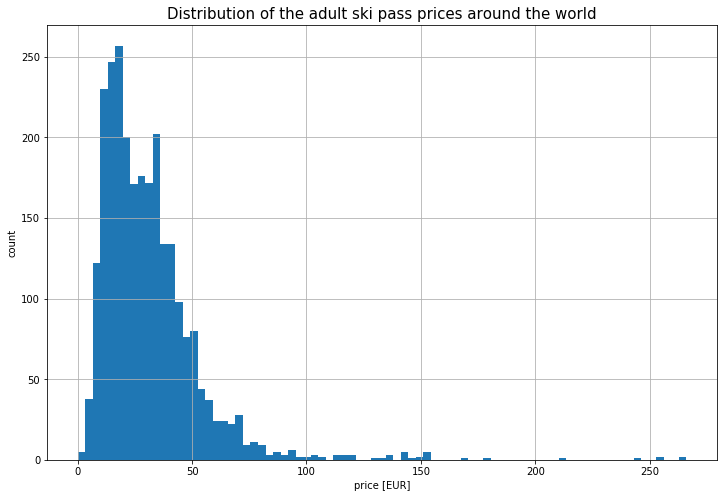

In [56]:
def histogram(df,hist_bins,title,x_title,y_title):
    """
    Function for ploting histogram.
    Input:  df - dataframe column ;
    hist_bins- number of bins or keyword 'fd' for Freedman-Diaconis rule
    title - main title
    x_title - title of x axis
    y_title - title of y axis
    
    Output: plt histogram.
    
    
    """
    assert_is_not_none(df)
    
    plt.figure(figsize=(12,8))
    df.hist(bins=hist_bins)
    plt.title(title,fontsize=15)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    #plt.show
histogram(most_ski_resorts["adult_eur"],'fd','Distribution of the adult ski pass prices around the world','price [EUR]','count')

In [57]:
most_ski_resorts[most_ski_resorts.adult_eur >170].sort_values(by='adult_eur',ascending = False)

,name,continent,country,state,url,altitude,easy,intermediate,dificult,resort_size,slope,lifts_cable_cars,total_slope,average_rating,adult_eur,adult_pr_per_km
737,catedral-alta-patagonia,South America,Argentina,Rio Negro,http://www.skiresort.info/ski-resort/catedral-...,2180.0,30.0,60.0,30.0,4.4,4.8,3.2,120.0,4.133333,266.0,2.216667
790,chapelco,South America,Argentina,Neuquen,http://www.skiresort.info/ski-resort/chapelco/,1970.0,15.0,25.0,5.0,3.1,3.4,3.6,45.0,3.366667,266.0,5.911111
762,cerro-castor,South America,Argentina,Tierra del Fuego,http://www.skiresort.info/ski-resort/cerro-cas...,1057.0,14.0,9.0,6.1,2.7,3.0,3.0,29.1,2.900000,256.0,8.797251
2454,las-lenas,South America,Argentina,Mendoza,http://www.skiresort.info/ski-resort/las-lenas/,3430.0,5.0,12.0,35.0,3.3,3.6,2.9,52.0,3.266667,254.0,4.884615
761,cerro-bayo,South America,Argentina,Neuquen,http://www.skiresort.info/ski-resort/cerro-bayo/,1730.0,5.0,4.0,3.0,2.2,2.6,3.5,12.0,2.766667,246.0,20.500000
739,caviahue,South America,Argentina,Neuquen,http://www.skiresort.info/ski-resort/caviahue/,2958.0,9.0,8.0,8.0,2.7,3.1,2.7,25.0,2.833333,212.4,8.496000
2382,la-hoya,South America,Argentina,Chubut,http://www.skiresort.info/ski-resort/la-hoya/,2075.0,2.8,5.6,5.6,2.3,2.6,2.8,14.0,2.566667,180.0,12.857143
369,beaver-creek,North America,USA,Colorado,http://www.skiresort.info/ski-resort/beaver-cr...,3488.0,28.5,64.5,57.0,4.0,5.0,4.0,150.0,4.444444,170.1,1.134000


In [0]:
def skew_factor(df,country):
    assert_is_not_none(df)
    """Prints the skew factor of dataframe column with the label from country variable"""
    print('The skew factor for ' + country + ' is = ' + str(df.skew()))

In [59]:
skew_factor(most_ski_resorts["adult_eur"],'all resorts')

The skew factor for all resorts is = 3.5630827606846753


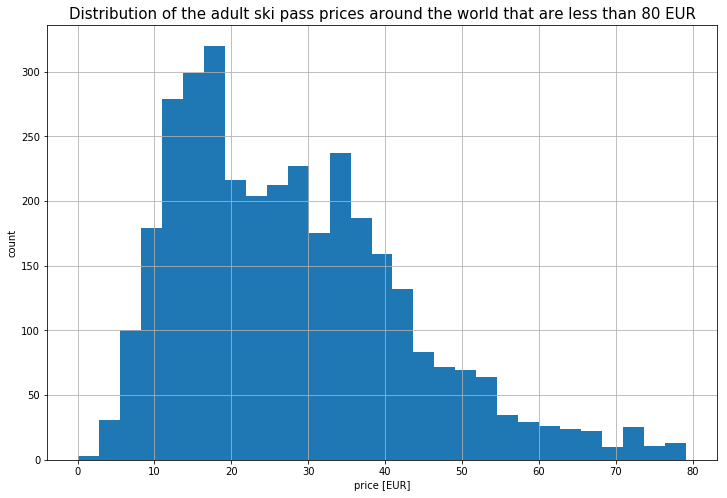

In [60]:
histogram(world_ski_resort[world_ski_resort.adult_eur<80]["adult_eur"],'fd','Distribution of the adult ski pass prices around the world that are less than 80 EUR','price [EUR]','count')

In [61]:
skew_factor(most_ski_resorts[most_ski_resorts.adult_eur<80]["adult_eur"],'all resorts cheaper than 75EUR')

The skew factor for all resorts cheaper than 75EUR is = 0.773088318815096


The distribution of prices around the world are not normal distributed. Skew factor is very high, for bigger that 1.5 we can conclude that there is a different type of distribution. There are a few very expensive resorts,we will try to separate the prices by country.

In [62]:
def top_records(most_ski_resorts,column,top_count):
    """The function returns top "top_count" records from column, sorted descending."""
    assert_is_not_none(most_ski_resorts)
    assert_true(column in set(most_ski_resorts.columns))
    
    top_countries = most_ski_resorts.groupby(by=column).size()
    top_countries.sort_values(ascending = False,inplace = True)
    top_countries = top_countries.head(top_count)
    return top_countries
top_countries = top_records(most_ski_resorts,'country',10)
top_countries

country
Germany           365
Austria           329
USA               307
Switzerland       250
France            226
Italy             189
Czech Republic    140
Japan             137
Canada            125
Poland             73
dtype: int64

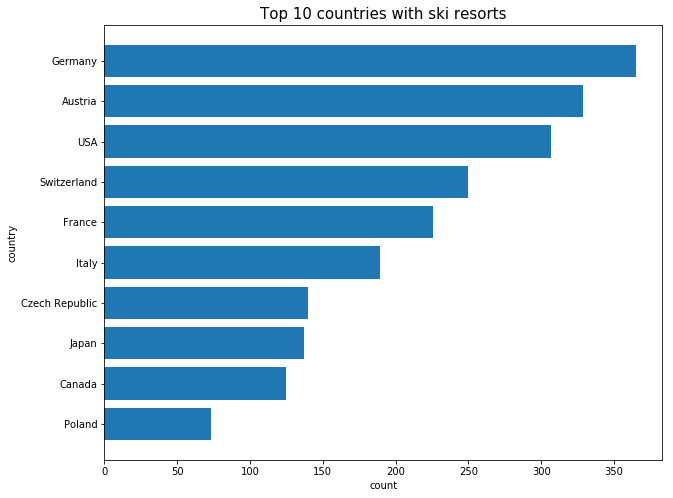

In [63]:
def plot_top_records(top_countries,title,x_label,y_label):
    """
    Creating a bar plot from input series.
    Input:
    top_countries - result from top_records() function
    title- main title
    x_label - label of x axis
    y_label - label of y axis    
    """
    assert_is_not_none(top_countries)
    
    plt.figure(figsize=(10,8))
    plt.barh(range(len(top_countries.index)), top_countries)
    plt.yticks(range(len(top_countries)),top_countries.index)
    plt.title(title,fontsize=15)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.gca().invert_yaxis()
    plt.show()
plot_top_records(top_countries,'Top 10 countries with ski resorts','count','country')

In [0]:
def plot_country_price_histogram(country,column,x_label):
    """
    Function to stack multiple histograms at once.
    Input:
    country - country name from the most_ski_resorts dataset
    column -column name for the histogram
    x_label - label for x_axis
    """
    assert_is_not_none(most_ski_resorts)
    assert_true(column in set(most_ski_resorts.columns))
    
    plt.hist(most_ski_resorts[most_ski_resorts.country == country][column],label = country, bins= 15, alpha=0.6)
    plt.title('Distribution of: ' + x_label +' along countries' )
    plt.xlabel(x_label)
    plt.ylabel('count')
    plt.legend()
    

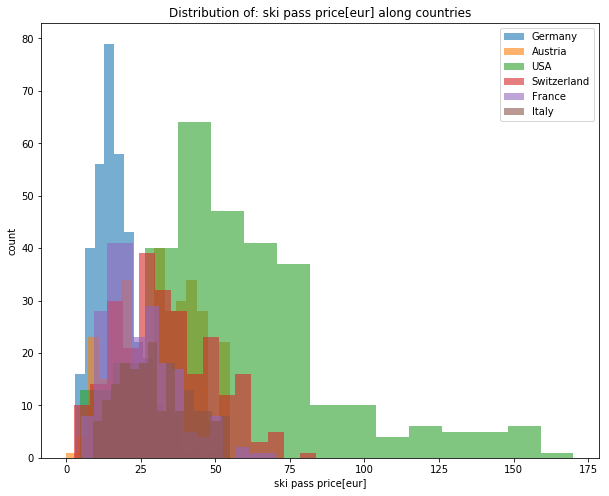

In [65]:
plot_country_price_histogram("Germany","adult_eur",'ski pass price[eur]')
plot_country_price_histogram("Austria","adult_eur",'ski pass price[eur]')
plot_country_price_histogram("USA","adult_eur",'ski pass price[eur]')
plot_country_price_histogram("Switzerland","adult_eur",'ski pass price[eur]')
plot_country_price_histogram("France","adult_eur",'ski pass price[eur]')
plot_country_price_histogram("Italy","adult_eur",'ski pass price[eur]')

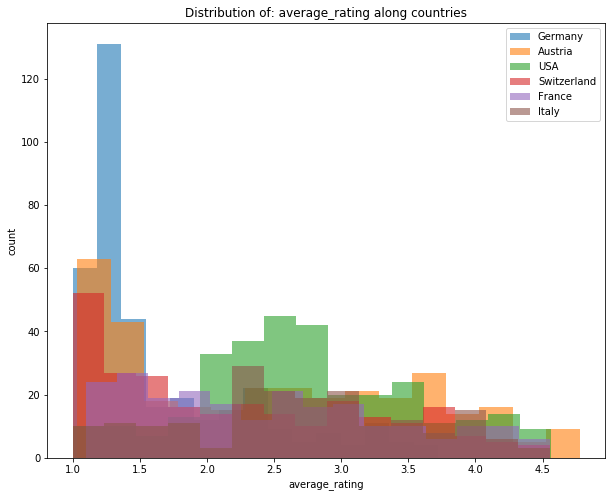

In [66]:
plot_country_price_histogram("Germany","average_rating","average_rating")
plot_country_price_histogram("Austria","average_rating","average_rating")
plot_country_price_histogram("USA","average_rating","average_rating")
plot_country_price_histogram("Switzerland","average_rating","average_rating")
plot_country_price_histogram("France","average_rating","average_rating")
plot_country_price_histogram("Italy","average_rating","average_rating")

In the diagram visually there is a difference between in the prices of Europe's resorts and USA's resorts. Also USA's resorts are with higher customer satisfaction rating. It will be interesting to check the correlation of the columns in the different countries. The following lines of code are checking the correlation for France,Switzerland and USA.

In [0]:
germany=most_ski_resorts[most_ski_resorts.country =='Germany']
austria=most_ski_resorts[most_ski_resorts.country =='Austria']
usa=most_ski_resorts[most_ski_resorts.country =='USA']
switzerland=most_ski_resorts[most_ski_resorts.country =='Switzerland']
france=most_ski_resorts[most_ski_resorts.country =='France']
italy=most_ski_resorts[most_ski_resorts.country =='Italy']

In [68]:
most_ski_resorts.corr()

,altitude,easy,intermediate,dificult,resort_size,slope,lifts_cable_cars,total_slope,average_rating,adult_eur,adult_pr_per_km
altitude,1.000000,0.418705,0.513090,0.482452,0.695822,0.679224,0.498907,0.522932,0.641192,0.452561,-0.335125
easy,0.418705,1.000000,0.767583,0.571214,0.695212,0.612938,0.398910,0.899162,0.566975,0.314658,-0.155420
intermediate,0.513090,0.767583,1.000000,0.736772,0.778310,0.707809,0.467625,0.951285,0.650183,0.467381,-0.168359
dificult,0.482452,0.571214,0.736772,1.000000,0.685960,0.648517,0.408409,0.811300,0.582914,0.594621,-0.145674
resort_size,0.695822,0.695212,0.778310,0.685960,1.000000,0.946021,0.700524,0.806906,0.898168,0.615562,-0.345369
slope,0.679224,0.612938,0.707809,0.648517,0.946021,1.000000,0.724390,0.731778,0.940453,0.629184,-0.348398
lifts_cable_cars,0.498907,0.398910,0.467625,0.408409,0.700524,0.724390,1.000000,0.476258,0.840728,0.536243,-0.311568
total_slope,0.522932,0.899162,0.951285,0.811300,0.806906,0.731778,0.476258,1.000000,0.670780,0.485798,-0.175959
average_rating,0.641192,0.566975,0.650183,0.582914,0.898168,0.940453,0.840728,0.670780,1.000000,0.630169,-0.334155
adult_eur,0.452561,0.314658,0.467381,0.594621,0.615562,0.629184,0.536243,0.485798,0.630169,1.000000,-0.078561


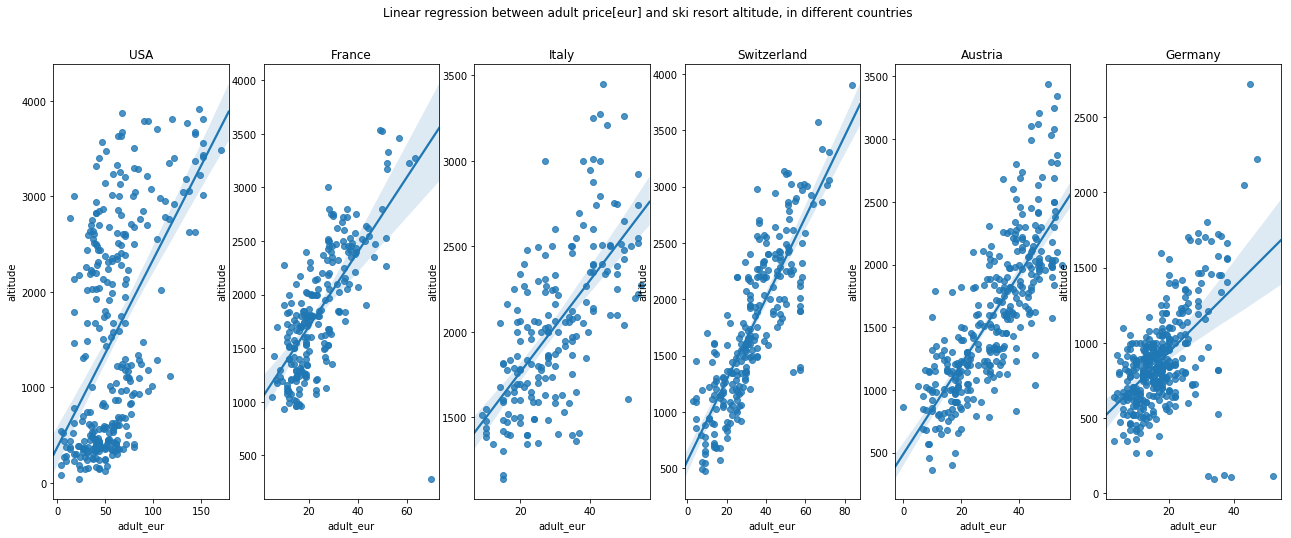

In [69]:
def plot_linreg(title,column1, column2, *args):
    """
    Function to create multiple heatmaps on the same line.
    Input: 
    title - main title of the map
    column1 - name of the first column for linear regression
    column2 - name of the second column for linear regression
    *args - dataframes, with same column names and containing column1 name and column2 name
    
    Output - multiple heatmaps on the same line
    The visualization cannot handle plot on many lines. It's just stack all input dataset on the same line.
    
    """
    fig = plt.figure(figsize=(22,8))
    total_plots = len(args)
    a ={}
    for i in range(total_plots +1):
        a[i] = "ax" + str(i)
    for count, dfs in enumerate(args):
        a[count] = fig.add_subplot(1,total_plots,count+1)
        sns.regplot(x= column1, y= column2, data = dfs)
        name=dfs.country.mode()[0]
        a[count].title.set_text((name))
    fig.suptitle(title)   
    

plot_linreg('Linear regression between adult price[eur] and ski resort altitude, in different countries',"adult_eur", "altitude",
            usa,
            france,
            italy,
            switzerland,
            austria,
            germany)

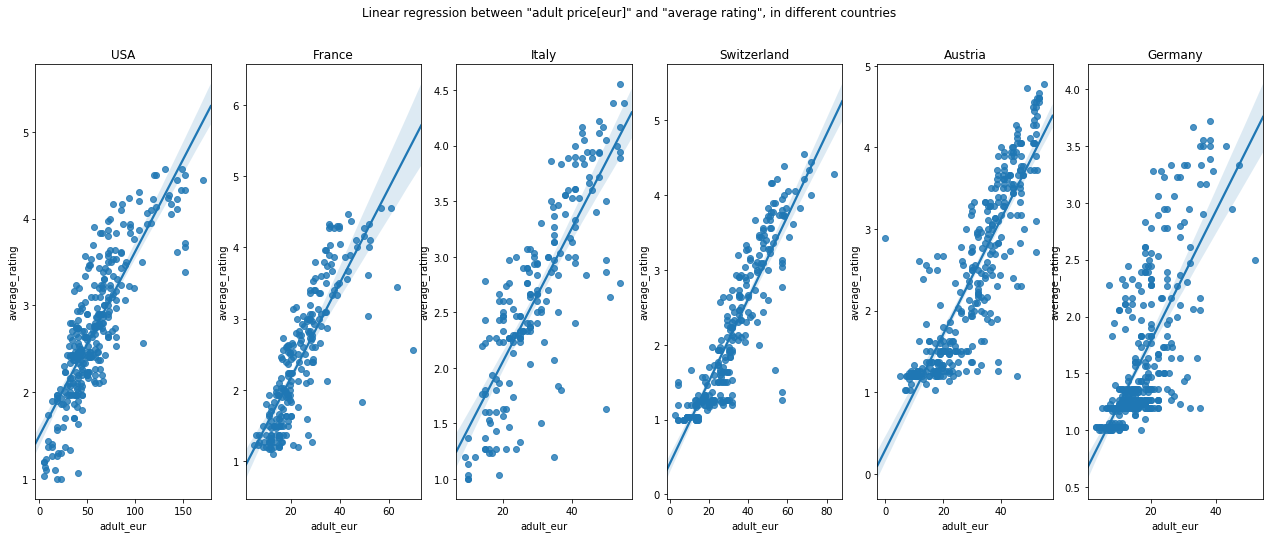

In [70]:
plot_linreg('Linear regression between "adult price[eur]" and "average rating", in different countries',"adult_eur", "average_rating",
            usa,
            france,
            italy,
            switzerland,
            austria,
            germany)

In [0]:
def plot_corr_heatmaps(title,*args):
    """
    Function to create multiple heatmaps on the same line.
    Input: 
    title - main title of the map
    *args - pivot dataframes, prepared from pivor_snowfall function
    
    Output - multiple heatmaps on the same line
    The visualization cannot handle plot on many lines. It's just stack all input dataset on the same line.
    
    """
    fig = plt.figure(figsize=(44,8))
    total_plots = len(args)
    a ={}
    for i in range(total_plots +1):
        a[i] = "ax" + str(i)
    for count, dfs in enumerate(args):
        a[count] = fig.add_subplot(1,total_plots,count+1)
        sns.heatmap(dfs, annot=True,fmt='.2f',ax = a[count], linewidths=.5, cmap="bwr" , vmin=-1.0, vmax=1.0)
    fig.suptitle(title)
    fig.savefig('heatmap.png')
    fig.show()

Please note: The reseach was done on google's platform named "Colab". If the next figure is visuallized very small -double click to enlarge it or use the following link to open the notebook: https://colab.research.google.com/drive/1Rllt3TsJxwsZayUm0akfwny_G0kWXlBo   
Another method is to open it manually "heatmap.png" on the same location where this file is located.

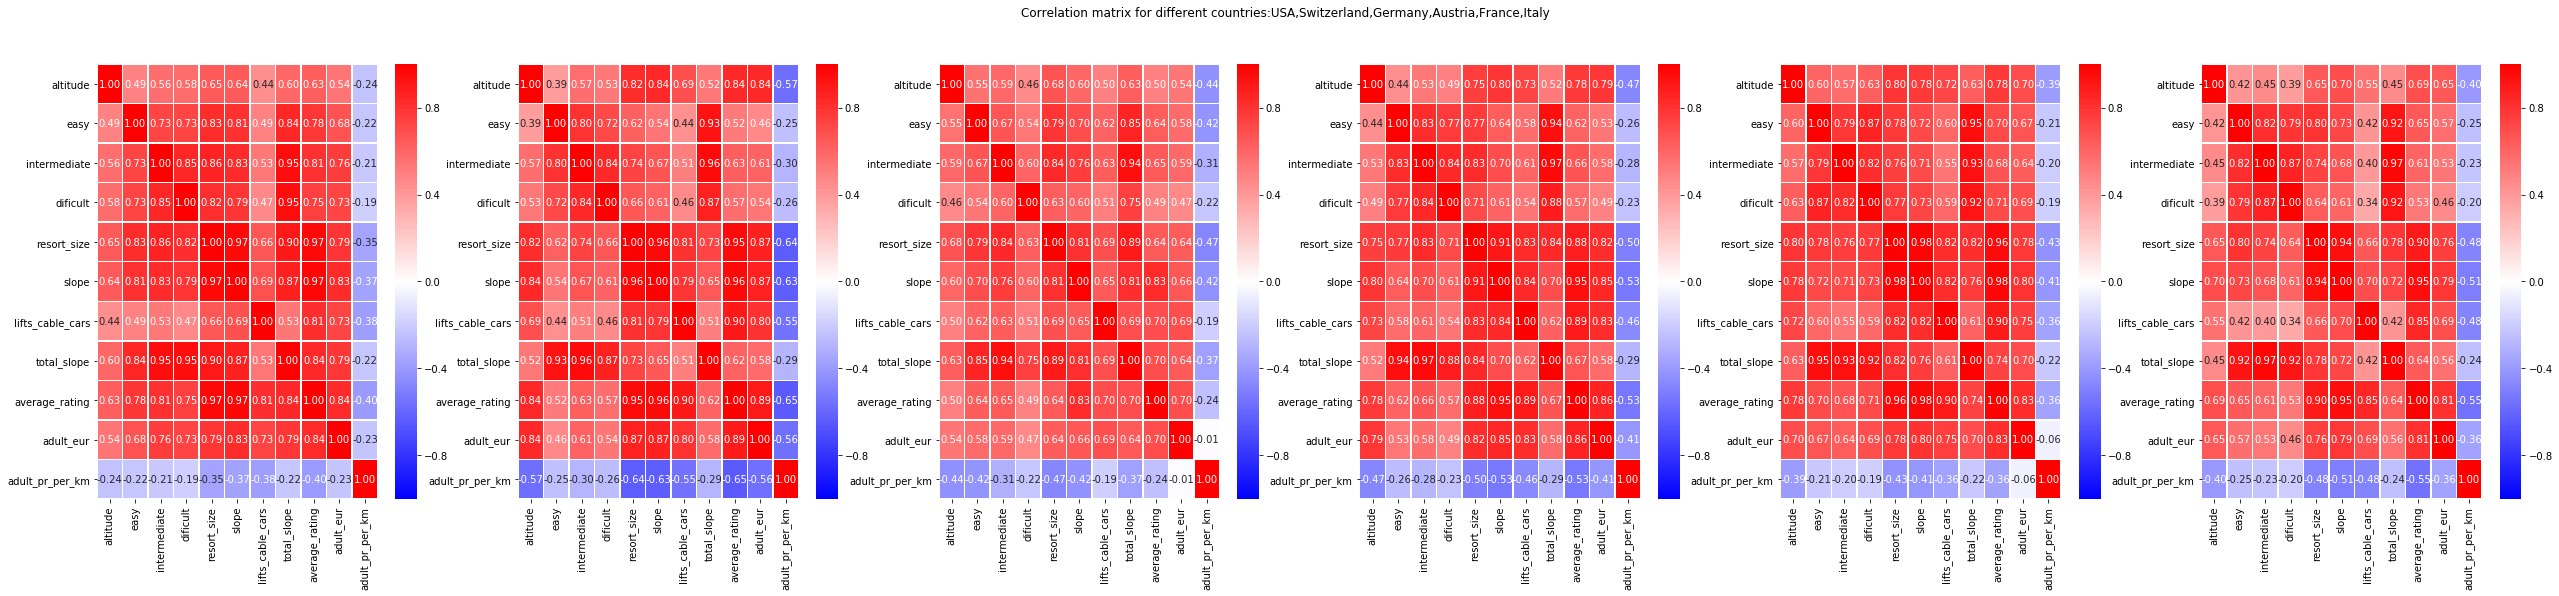

In [72]:
plot_corr_heatmaps('Correlation matrix for different countries:USA,Switzerland,Germany,Austria,France,Italy',usa.corr(),switzerland.corr(),germany.corr(),austria.corr(),france.corr(),italy.corr())

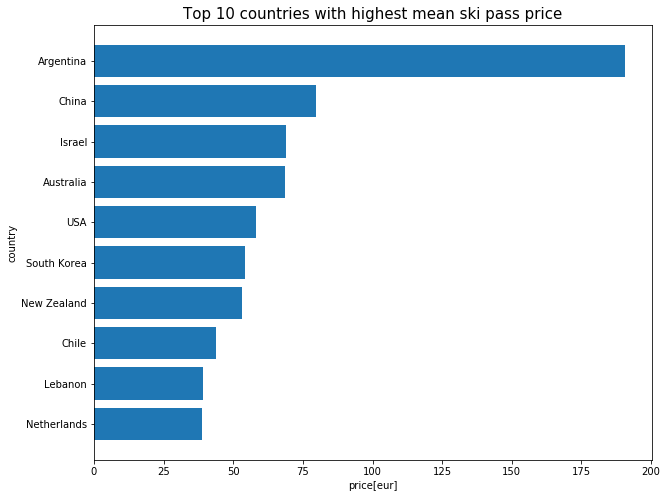

In [73]:
most_expensive_countries = most_ski_resorts.groupby(by='country')['adult_eur'].mean().sort_values(ascending=False).head(10)
plot_top_records(most_expensive_countries ,'Top 10 countries with highest mean ski pass price','price[eur]','country')

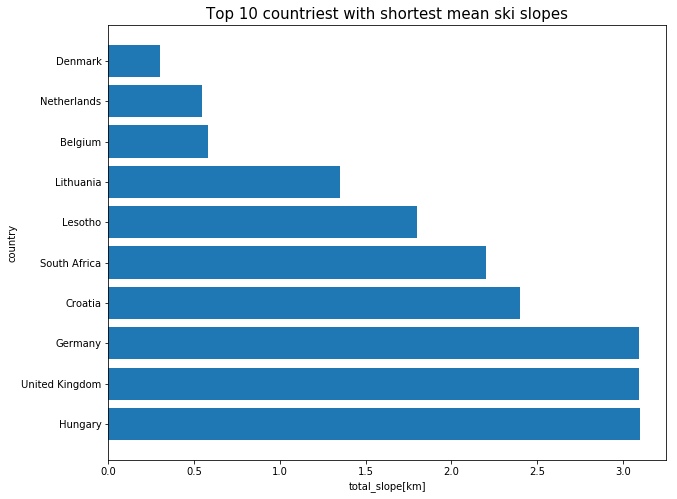

In [74]:
low_slope_dist = most_ski_resorts.groupby(by='country')['total_slope'].mean().sort_values(ascending=True).head(10)
plot_top_records(low_slope_dist,'Top 10 countriest with shortest mean ski slopes','total_slope[km]','country')

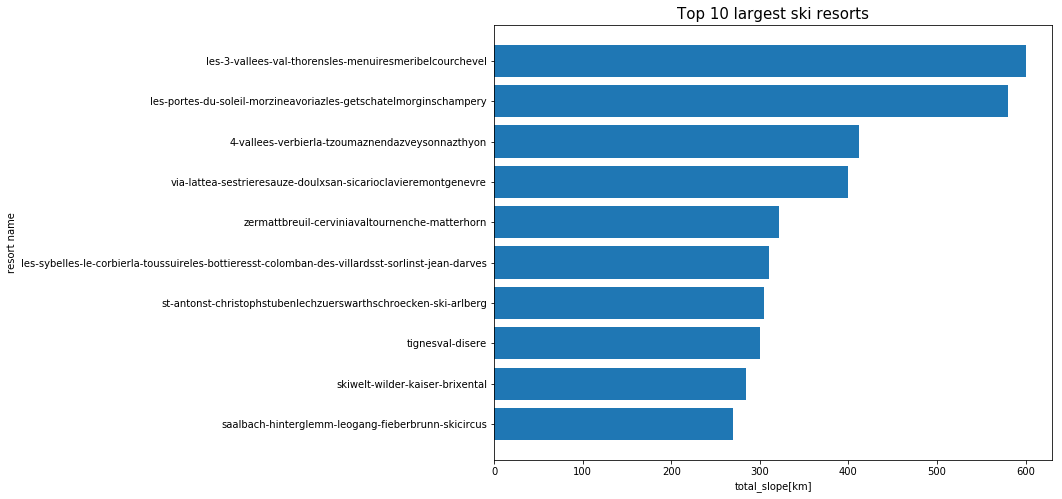

In [75]:
largest_resorts = most_ski_resorts.groupby(by='name')['total_slope'].max().sort_values(ascending=False).head(10)
plot_top_records(largest_resorts,'Top 10 largest ski resorts','total_slope[km]','resort name')

In [76]:
most_ski_resorts.sort_values(by=['total_slope'],ascending=False).head(10)

,name,continent,country,state,url,altitude,easy,intermediate,dificult,resort_size,slope,lifts_cable_cars,total_slope,average_rating,adult_eur,adult_pr_per_km
2529,les-3-vallees-val-thorensles-menuiresmeribelco...,Europe,France,Auvergne-Rhone-Alpes,http://www.skiresort.info/ski-resort/les-3-val...,3230.0,312.0,216.0,72.0,5.0,5.0,4.0,600.0,4.555556,61.00,0.101667
2558,les-portes-du-soleil-morzineavoriazles-getscha...,Europe,Switzerland,Lemanic Region,http://www.skiresort.info/ski-resort/les-porte...,2254.0,310.0,210.0,60.0,5.0,5.0,4.0,580.0,4.166667,52.00,0.089655
1,4-vallees-verbierla-tzoumaznendazveysonnazthyon,Europe,Switzerland,Lemanic Region,http://www.skiresort.info/ski-resort/4-vallees...,3330.0,107.0,202.0,103.0,5.0,5.0,4.0,412.0,4.222222,68.25,0.165655
5121,via-lattea-sestrieresauze-doulxsan-sicarioclav...,Europe,Italy,Piedmont (Piemonte),http://www.skiresort.info/ski-resort/via-latte...,2749.0,96.0,220.0,84.0,5.0,5.0,4.0,400.0,4.111111,48.00,0.120000
5429,zermattbreuil-cerviniavaltournenche-matterhorn,Europe,Switzerland,Lemanic Region,http://www.skiresort.info/ski-resort/zermattbr...,3899.0,75.0,220.0,27.0,5.0,5.0,4.0,322.0,4.277778,83.72,0.260000
2564,les-sybelles-le-corbierla-toussuireles-bottier...,Europe,France,Auvergne-Rhone-Alpes,http://www.skiresort.info/ski-resort/les-sybel...,2620.0,53.0,239.0,18.5,5.0,5.0,3.0,310.5,3.888889,44.20,0.142351
4535,st-antonst-christophstubenlechzuerswarthschroe...,Europe,Austria,Tyrol (Tirol),http://www.skiresort.info/ski-resort/st-antons...,2811.0,132.0,123.0,50.0,5.0,5.0,5.0,305.0,4.611111,53.00,0.173770
4856,tignesval-disere,Europe,France,Auvergne-Rhone-Alpes,http://www.skiresort.info/ski-resort/tignesval...,3456.0,170.0,78.0,52.0,5.0,5.0,4.0,300.0,4.555556,57.00,0.190000
4374,skiwelt-wilder-kaiser-brixental,Europe,Austria,Tyrol (Tirol),http://www.skiresort.info/ski-resort/skiwelt-w...,1957.0,122.0,129.0,33.0,5.0,5.0,5.0,284.0,4.722222,49.00,0.172535
4007,saalbach-hinterglemm-leogang-fieberbrunn-skici...,Europe,Austria,Salzburg (Salzburger Land),http://www.skiresort.info/ski-resort/saalbach-...,2096.0,140.0,112.0,18.0,5.0,5.0,5.0,270.0,4.611111,53.00,0.196296


## 3.Hypothesys testing

### Is there a statistically significant difference in ski pass prices between the top countries with ski resorts(USA,Germany,Austria,Switzerland,France,Italy)?
  * $H_0$: No statistically significant difference in ski prices
  * $H_1$: Statistically significant, difference in ski pass prices 
  * $\\alpha = 0,05$" 

In [0]:
resorts_to_test = most_ski_resorts[most_ski_resorts.country.str.contains('France|Switzerland|Italy|Austria|Germany|USA')][['country','adult_eur','average_rating']]

In [0]:
group_by_country = { k : v.tolist() for k, v in resorts_to_test.groupby('country').adult_eur}

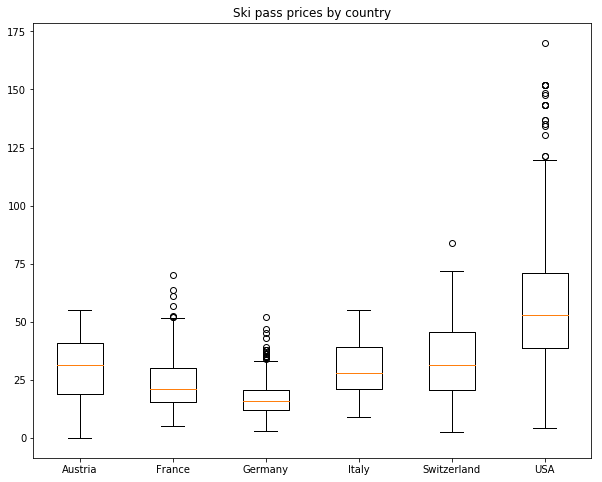

In [79]:
def box_ploting(group_by_country):
    """ A boxploting function with a dictionanary for input"""
    assert_is_not_none(group_by_country)
    
    plt.boxplot(group_by_country.values())
    plt.title('Ski pass prices by country')
    labels = group_by_country.keys()
    plt.xticks(range(1, len(labels) + 1), labels)
    plt.show()
    
    
box_ploting(group_by_country)

In [0]:
def anova_oneway(*args):
    """Performs a one way ANOVA test.
    The one-way ANOVA tests the null hypothesis that two or more groups have
    the same population mean.  The test is applied to samples from two or
    more groups, possibly with differing sizes.
    If the pvalue is less that 5% prints a message that the null hypothesys is rejected."""
    
    
    stat,pvalue = st.f_oneway(*args)
    print("P-value is equal to: " + str(pvalue))
    if pvalue >= 0.05:
        print("The null hypothesis can't be rejected. We can't accept (or reject) any other hypothesis")
    if pvalue < 0.05:
        print('The null hypothesis is rejected. There is a statistically significant difference between the groups.')

In [102]:
anova_oneway(group_by_country['France'],group_by_country['Italy'],group_by_country['Switzerland'],
            group_by_country['Austria'],group_by_country['Germany'],group_by_country['USA'])

P-value is equal to: 3.18253102931036e-168
The null hypothesis is rejected. There is a statistically significant difference between the groups.


### Is there a statistically significant difference in ski pass prices between the top European countries with ski resorts(Germany,Austria,Switzerland,France,Italy)?
  * $H_0$: No statistically significant difference in ski prices
  * $H_1$: Statistically significant, difference in ski pass prices 
  * $\\alpha = 0,05$" 

In [103]:
anova_oneway(group_by_country['France'],group_by_country['Italy'],group_by_country['Switzerland'],
            group_by_country['Austria'],group_by_country['Germany'])

P-value is equal to: 5.578859079804005e-65
The null hypothesis is rejected. There is a statistically significant difference between the groups.


### Is there a statistically significant difference in ski pass prices between the Switzerland and Austria?
  * $H_0$: No statistically significant difference in ski prices
  * $H_1$: Statistically significant, difference in ski pass prices 
  * $\\alpha = 0,05$" 

In [104]:
anova_oneway(group_by_country['Switzerland'],group_by_country['Austria'])

P-value is equal to: 0.06151860313941228
The null hypothesis can't be rejected. We can't accept (or reject) any other hypothesis


### Is there a statistically significant difference in *average  rating* between the top countries with ski resorts?
  * $H_0$: No statistically significant difference in ski prices
  * $H_1$: Statistically significant, difference in ski pass prices 
  * $\\alpha = 0,05$" 

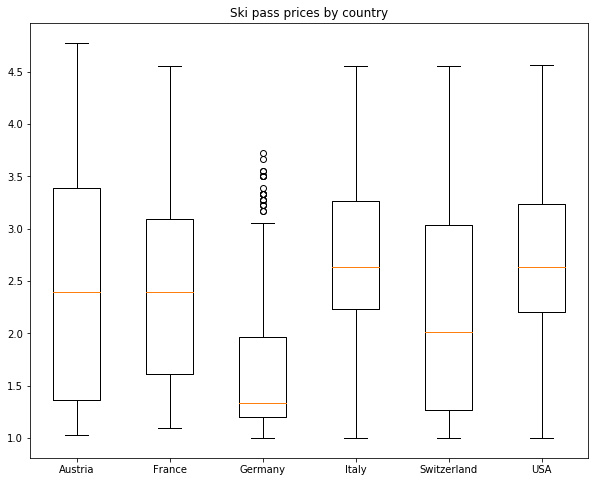

In [105]:
group_by_country_rating = { k : v.tolist() for k, v in resorts_to_test.groupby('country').average_rating}
box_ploting(group_by_country_rating)

In [106]:
anova_oneway(group_by_country_rating['France'],group_by_country_rating['Italy'],group_by_country_rating['Switzerland'],
            group_by_country_rating['Austria'],group_by_country_rating['Germany'],group_by_country_rating['USA'])

P-value is equal to: 4.831803117802931e-63
The null hypothesis is rejected. There is a statistically significant difference between the groups.


In [107]:
anova_oneway(group_by_country_rating['France'],group_by_country_rating['Italy'],group_by_country_rating['Switzerland'],
            group_by_country_rating['Austria'],group_by_country_rating['USA'])

P-value is equal to: 2.4296154888721112e-09
The null hypothesis is rejected. There is a statistically significant difference between the groups.


### Is there a linear relationship between ski pass prices and altitude in Switzerland?
  * $H_0$: No linear relationship between *adult_eur* and *altitude*  in Switzerland
  * $H_1$: Some linear relation exists between  between *adult_eur* and *altitude*  in Switzerland 
  * $\\alpha = 0,05$"  




In [108]:
def find_correlation(df,column1,column2):
    """
    Function to calculate pearson correlation coefficient with p-value.
    """
    assert_is_not_none(df)
    assert_true(column1 in set(df.columns))
    assert_true(column2 in set(df.columns))
    
    df = df.dropna()
    pearson_coef, p_value = st.pearsonr(df[column1], df[column2])
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
find_correlation(most_ski_resorts,'altitude','adult_eur')

The Pearson Correlation Coefficient is 0.452560725550268  with a P-value of P = 5.0208912035988325e-132


**Conclusion**:  Since the p-value is < 0.001, the correlation between altitude and price is statistically significant, although the linear relationship between price and altitude across the world is low positive (~0.453). 

In [109]:
find_correlation(switzerland,'altitude','adult_eur')

The Pearson Correlation Coefficient is 0.83839150661668  with a P-value of P = 2.6300830104570918e-67


**Conclusion**:  Since the p-value is < 0.001, the correlation between altitude and price is statistically significant, although the linear relationship between price and altitude in Switzerland is high positive(~0.838). 

In [0]:
def linear_regression_r(df,column1,column2):
    """Function to calculate r-squared value and p-value on linear reggresion model.
    Input:df - Panda's dataframe 
    column1 - first column from df
    column2 - second column from df
    """
    
    slope, intercept, r_value, p_value, std_err = st.linregress(df[column1],df[column2])
    print("R-squared: ", r_value**2, " with a P-value of P =", p_value)

In [111]:
linear_regression_r(switzerland,'altitude','adult_eur')

R-squared:  0.7029003183669865  with a P-value of P = 2.63008301045747e-67


The coefficient of determination (R-squared) is (~0.703), so approximate 70.3% of the data could be described with this linear regression function between "altitude" and adult ski pass price 'adult_eur' in Switzerland. P-value is lower that 5%, so we can reject the null hypothesis. Changes to the altitude are related to changes to the ski pass prices in Switzerland. 

## Conclusions:
> The research confirms that some of the top countries have a part of the Alps in their territory, but also and USA have a lot of ski resorts.


> The top 6 countries with ski resorts are: Germany, Austria,USA,Switzerland,France,Italy. 
  There is a statistically significant difference in the ski pass prices. In some countries there is a linear relationship between altitude and ski pass prices.
  
  
> In Germany the ski pass prices are cheaper that the other countries, unfortunately Germany have the lowest average rating compared to the other top countries.In this top 6 countries USA have the most expensive prices. Germany is in the top 10 countries with low average slope distance per resort.


> In conclusion France and Italy are great countries to visit for a winter vacation, because of the low prices and high overall rating, compared to the other countries. 
The largest ski resort in our dataset is in France, named "Val Thorens" with 600km of ski slopes with adult ski pass price of 61.0 euro. As per [9] this resort is also top rated on 10 places as the best in the world. As per [9] the countries that have this top resorts are: France, Switzerland, Canada, USA, Austria. As per[8] the cheapest ski resorts in Europe are in: Bulgaria, Slovenia,Slovakia,Italy,France.

>For the snowfall dataset we can confirm [10] that in January, February and March there is a good quality of a fresh new snow.

## Resources:

[1] Ski Resorts -https://www.kaggle.com/beaubellamy/ski-resort  
[2] Ski Resorts Daily snowfall - https://www.kaggle.com/mrmarjo/resort-daily-snowfall-20092017  
[3] SoftUni DataScience course   
[4] Correlation coeficient interpretetion table - http://www.bioline.org.br/pdf?mm12018  
[5] R_squared regression - https://statisticsbyjim.com/regression/interpret-r-squared-regression/  
[6] Scipy.stats documentation  - https://docs.scipy.org/doc/scipy/reference/stats.html  
[7] 16 Top ski resorts - https://www.planetware.com/world/top-rated-ski-resorts-in-the-world-us-co-88.htm  
[8] Cheapest ski resorts in Europe - https://www.europeanbestdestinations.com/best-of-europe/cheapest-ski-resorts-in-europe/  
[9] Best ski resorts in the world 2018 - https://www.cntraveller.com/gallery/best-ski-resorts-in-the-world  
[10]  Best time for ski - https://www.undercovertourist.com/blog/best-time-ski/  
[11]Pandas cheatsheet - https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf  
[12] Coursera Data Analysis course - exploratory-data-analysis.ipynb https://www.coursera.org/learn/data-analysis-with-python  